### Importing the Packages

In [1]:
!pip install category_encoders

In [2]:
!pip install xgboost

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler ,PolynomialFeatures
from category_encoders import BinaryEncoder
from sklearn.model_selection import train_test_split , GridSearchCV
from xgboost import XGBRegressor
import xgboost as xgb

In [4]:
import warnings
warnings.filterwarnings("ignore")

In [5]:
# loding the dataset
df = pd.read_csv("Walmart DataSet.csv", parse_dates=['Date'], dayfirst=True)

# DATA EXPLORAION

In [6]:
# displaying the first 5 rows with data
df.head()

Store       Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0      1 2010-02-05    1643690.90             0        42.31       2.572   
1      1 2010-02-12    1641957.44             1        38.51       2.548   
2      1 2010-02-19    1611968.17             0        39.93       2.514   
3      1 2010-02-26    1409727.59             0        46.63       2.561   
4      1 2010-03-05    1554806.68             0        46.50       2.625   

          CPI  Unemployment  
0  211.096358         8.106  
1  211.242170         8.106  
2  211.289143         8.106  
3  211.319643         8.106  
4  211.350143         8.106

In [7]:
# displaying the last 5 rows with data
df.tail()


Store       Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
6430     45 2012-09-28     713173.95             0        64.88       3.997   
6431     45 2012-10-05     733455.07             0        64.89       3.985   
6432     45 2012-10-12     734464.36             0        54.47       4.000   
6433     45 2012-10-19     718125.53             0        56.47       3.969   
6434     45 2012-10-26     760281.43             0        58.85       3.882   

             CPI  Unemployment  
6430  192.013558         8.684  
6431  192.170412         8.667  
6432  192.327265         8.667  
6433  192.330854         8.667  
6434  192.308899         8.667

In [8]:
# formating the dates into date, month and year
df['Date'] = pd.to_datetime(df['Date'])
df['Day'] = df['Date'].dt.weekday
df['Month'] = df['Date'].dt.month
df['Year']  = df['Date'].dt.year
df.head()

Store       Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0      1 2010-02-05    1643690.90             0        42.31       2.572   
1      1 2010-02-12    1641957.44             1        38.51       2.548   
2      1 2010-02-19    1611968.17             0        39.93       2.514   
3      1 2010-02-26    1409727.59             0        46.63       2.561   
4      1 2010-03-05    1554806.68             0        46.50       2.625   

          CPI  Unemployment  Day  Month  Year  
0  211.096358         8.106    4      2  2010  
1  211.242170         8.106    4      2  2010  
2  211.289143         8.106    4      2  2010  
3  211.319643         8.106    4      2  2010  
4  211.350143         8.106    4      3  2010

In [9]:
# displaing the data frame info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
 8   Day           6435 non-null   int64         
 9   Month         6435 non-null   int64         
 10  Year          6435 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(5)
memory usage: 553.1 KB


In [10]:
# displaying the number of rows and columns
df.shape

(6435, 11)

In [11]:
# check the number of missing values
df.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
Day             0
Month           0
Year            0
dtype: int64

In [12]:
#  display the number of unique values
df.nunique().sort_values()

Day                1
Holiday_Flag       2
Year               3
Month             12
Store             45
Date             143
Unemployment     349
Fuel_Price       892
CPI             2145
Temperature     3528
Weekly_Sales    6435
dtype: int64

In [13]:
# generate summary statistics of the numerical columns in dataset
df.describe()

Store  Weekly_Sales  Holiday_Flag  Temperature   Fuel_Price  \
count  6435.000000  6.435000e+03   6435.000000  6435.000000  6435.000000   
mean     23.000000  1.046965e+06      0.069930    60.663782     3.358607   
std      12.988182  5.643666e+05      0.255049    18.444933     0.459020   
min       1.000000  2.099862e+05      0.000000    -2.060000     2.472000   
25%      12.000000  5.533501e+05      0.000000    47.460000     2.933000   
50%      23.000000  9.607460e+05      0.000000    62.670000     3.445000   
75%      34.000000  1.420159e+06      0.000000    74.940000     3.735000   
max      45.000000  3.818686e+06      1.000000   100.140000     4.468000   

               CPI  Unemployment     Day        Month         Year  
count  6435.000000   6435.000000  6435.0  6435.000000  6435.000000  
mean    171.578394      7.999151     4.0     6.447552  2010.965035  
std      39.356712      1.875885     0.0     3.238308     0.797019  
min     126.064000      3.879000     4.0     1.000000  2010.000000  
25%     131.735000      6.891000     4.0     4.000000  2010.000000  
50%     182.616521      7.874000     4.0     6.000000  2011.000000  
75%     212.743293      8.622000     4.0     9.000000  2012.000000  
max     227.232807     14.313000     4.0    12.000000  2012.000000

## EXPLORATORY DATA ANALYSIS

#### UNIVARIATE ANALYSIS

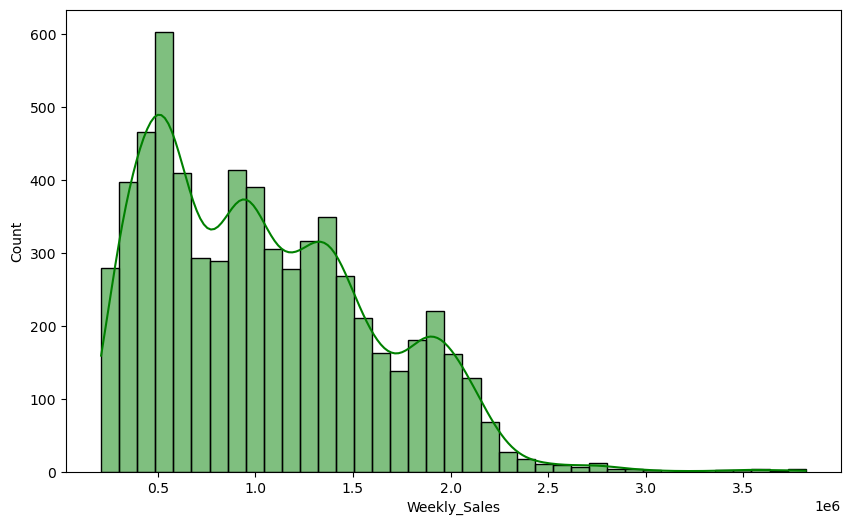

In [14]:
#  creates a histogram plot using the Seaborn library to visualize the distribution of the 'Weekly_Sales'
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Weekly_Sales', kde=True,color="green")
plt.show()

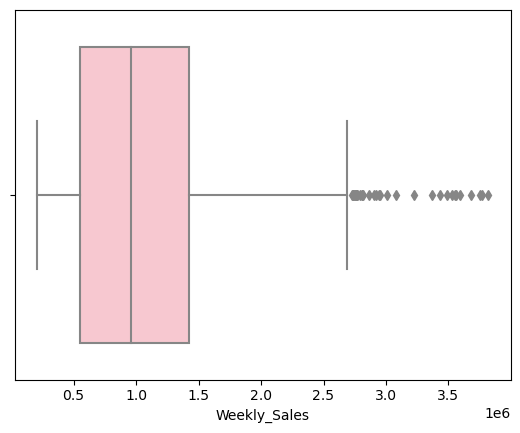

In [15]:
# creates a boxplot using the Seaborn library to visualize the distribution of the 'Weekly_Sales'
sns.boxplot(data=df, x='Weekly_Sales', orient='h',color="pink")
plt.show()

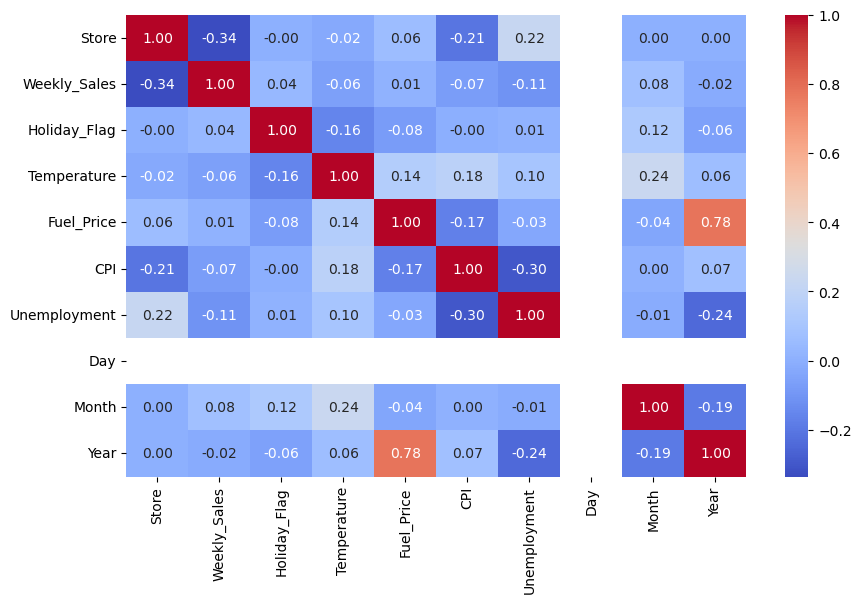

In [16]:
# the Seaborn library to visualize the correlation matrix of the DataFrame
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), cmap='coolwarm', annot=True, fmt='.2f')
plt.show()

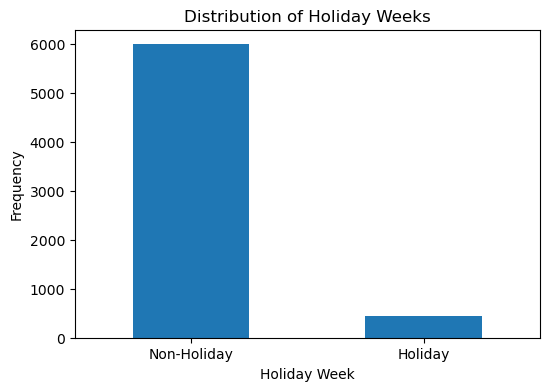

In [17]:
# Matplotlib and Seaborn libraries to create a bar plot showing the distribution of holiday weeks in the DataFrame
plt.figure(figsize=(6, 4))
df['Holiday_Flag'].value_counts().plot(kind='bar')
plt.xlabel('Holiday Week')
plt.ylabel('Frequency')
plt.title('Distribution of Holiday Weeks')
plt.xticks([0, 1], ['Non-Holiday', 'Holiday'], rotation=0)
plt.show()

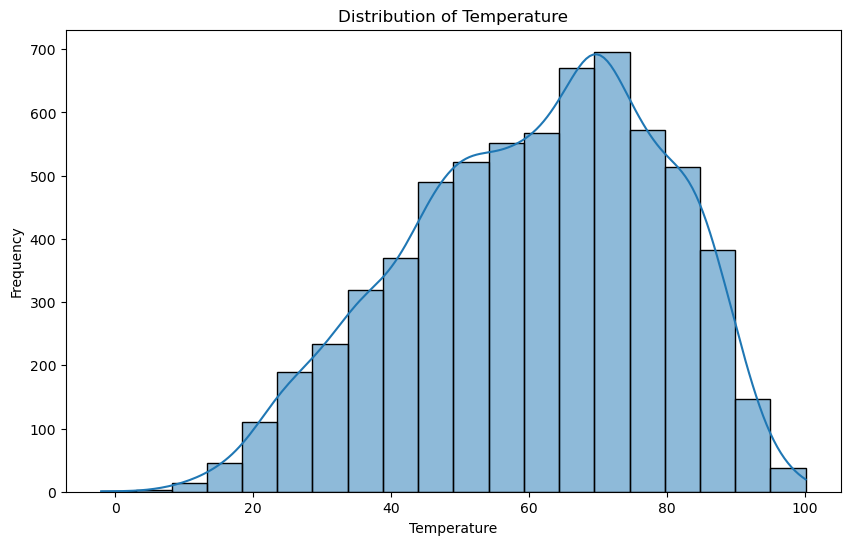

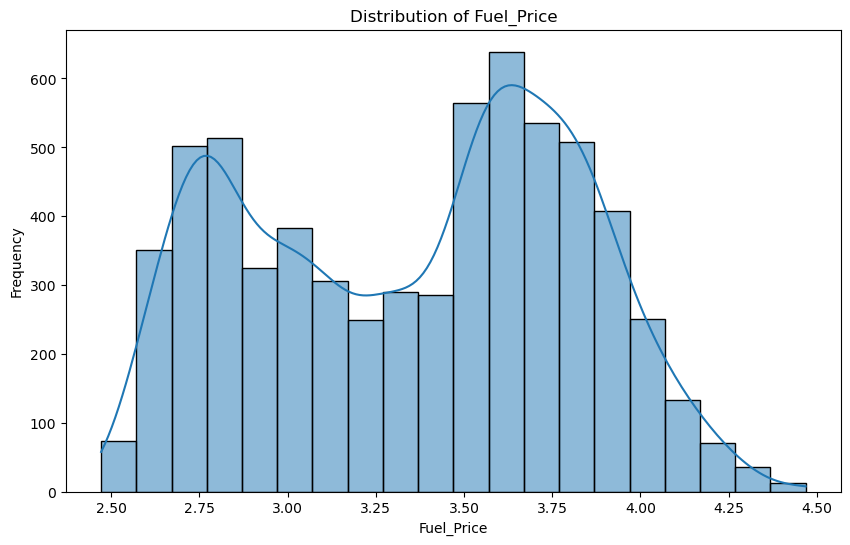

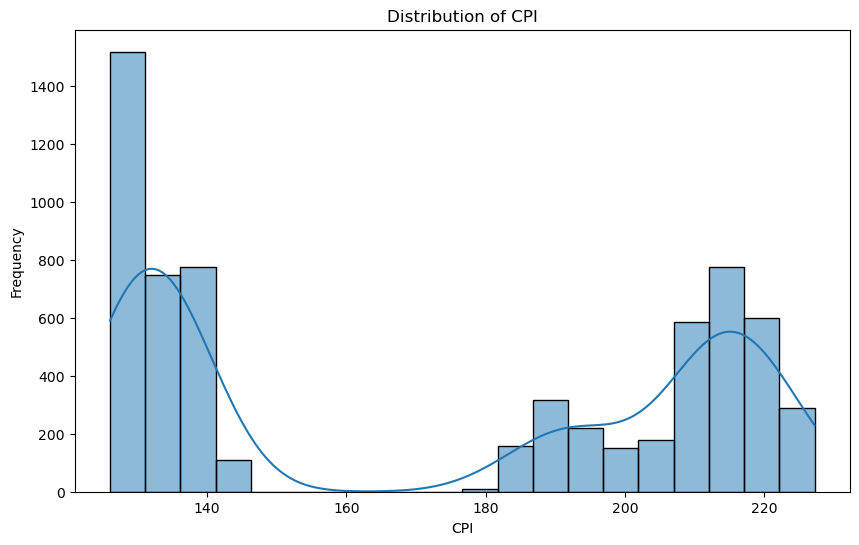

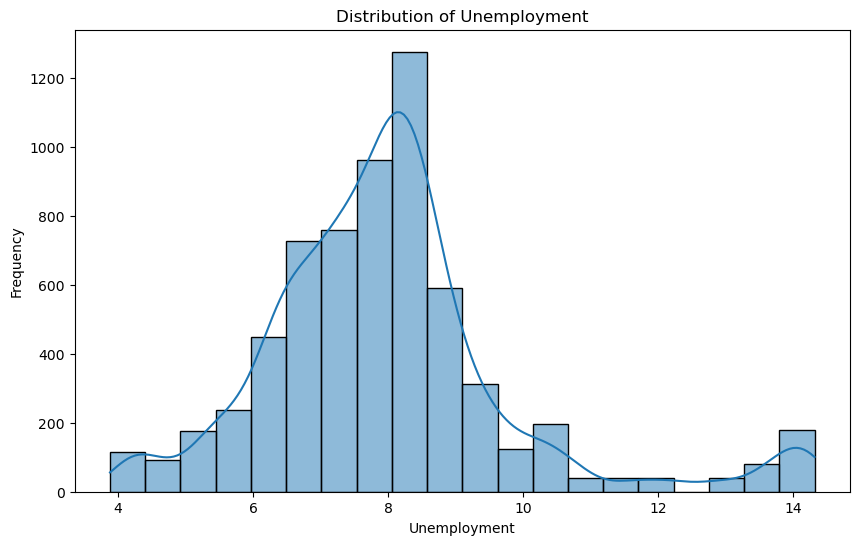

In [18]:
#  creates histograms to visualize the distribution of selected features in the DataFrame
features_to_plot = ['Temperature', 'Fuel_Price', 'CPI', 'Unemployment']
for feature in features_to_plot:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[feature], bins=20, kde=True)
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.title(f'Distribution of {feature}')
    plt.show()

#### BIVARIATE ANALYSIS

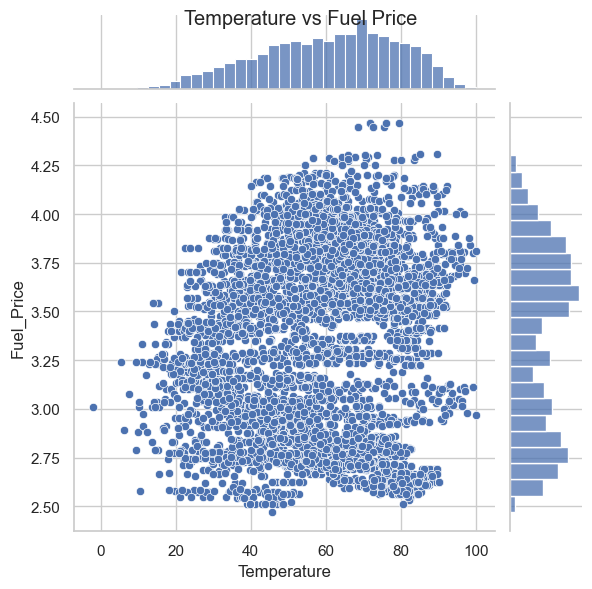

In [19]:
# creates a joint scatter plot to visualize the relationship between the 'Temperature' and 'Fuel_Price'
sns.set(style="whitegrid")
sns.jointplot(x='Temperature', y='Fuel_Price', data=df, kind='scatter')
plt.suptitle("Temperature vs Fuel Price")
plt.show()

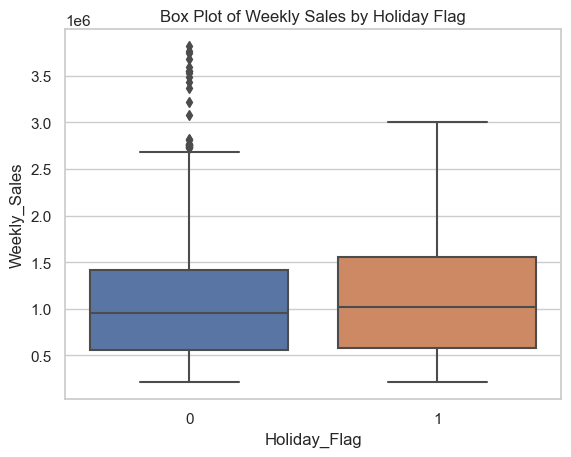

In [20]:
# generates a box plot to visualize the distribution of 'Weekly_Sales' based on the 'Holiday_Flag'
sns.boxplot(x='Holiday_Flag', y='Weekly_Sales', data=df)
plt.title('Box Plot of Weekly Sales by Holiday Flag')
plt.show()

#### A. If the weekly sales are affected by the unemployment rate, if yes - which stores are suffering the most?

In [21]:
# calculates the correlation between the 'Unemployment' and 'Weekly_Sales'
store_correlations = df.groupby('Store')['Unemployment', 'Weekly_Sales'].corr().iloc[0::2, -1]
most_suffering_stores = store_correlations[store_correlations < -0.2]
print("Stores suffering the most due to Unemployment:")
print(most_suffering_stores)

Stores suffering the most due to Unemployment:
Store              
3      Unemployment   -0.230413
4      Unemployment   -0.337015
5      Unemployment   -0.207043
17     Unemployment   -0.263600
37     Unemployment   -0.221287
38     Unemployment   -0.785290
39     Unemployment   -0.384681
41     Unemployment   -0.350630
42     Unemployment   -0.356355
43     Unemployment   -0.201954
44     Unemployment   -0.780076
Name: Weekly_Sales, dtype: float64


#### B. If the weekly sales show a seasonal trend, when and what could be the reason?

In [22]:
# calculates the monthly average sales by grouping the data
monthly_average_sales = df.groupby(['Year', 'Month'])['Weekly_Sales'].mean()

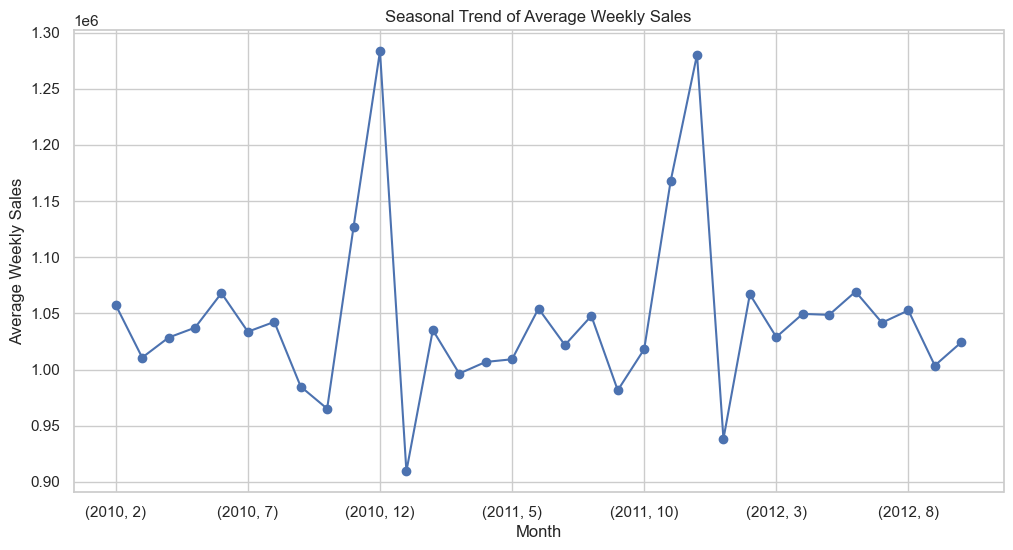

In [23]:
# creates a line plot to visualize the seasonal trend of the average weekly sales
plt.figure(figsize=(12, 6))
monthly_average_sales.plot(marker='o')
plt.xlabel('Month')
plt.ylabel('Average Weekly Sales')
plt.title('Seasonal Trend of Average Weekly Sales')
plt.grid(True)
plt.show()


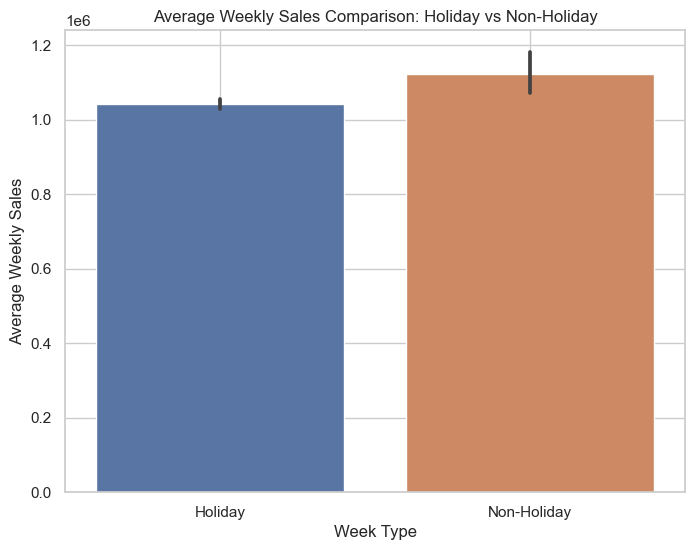

In [24]:
#  creates a bar plot to compare the average weekly sales between holiday and non-holiday weeks
holiday_weeks = df[df['Holiday_Flag'] == 1]
non_holiday_weeks = df[df['Holiday_Flag'] == 0]

plt.figure(figsize=(8, 6))
sns.barplot(x='Holiday_Flag', y='Weekly_Sales', data=pd.concat([holiday_weeks, non_holiday_weeks]))
plt.xticks(ticks=[0, 1], labels=['Holiday', 'Non-Holiday'])
plt.title('Average Weekly Sales Comparison: Holiday vs Non-Holiday')
plt.xlabel('Week Type')
plt.ylabel('Average Weekly Sales')
plt.grid(True)
plt.show()

#### C. Does temperature affect the weekly sales in any manner?

In [25]:
# calculates the correlation coefficient between the 'Temperature' column and the 'Weekly_Sales' column
correlation_temperature_sales = df['Temperature'].corr(df['Weekly_Sales'])

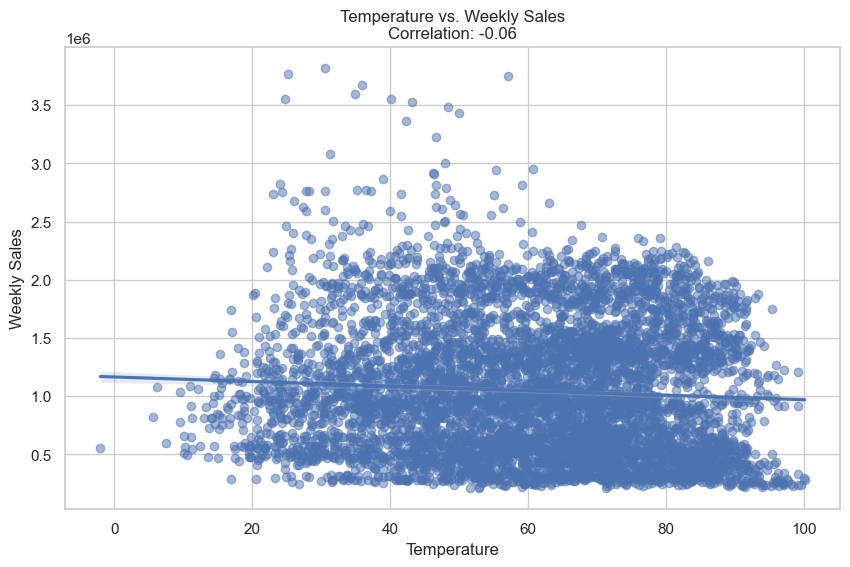

In [26]:
# Create a scatter plot with a regression line
plt.figure(figsize=(10, 6))
sns.regplot(x='Temperature', y='Weekly_Sales', data=df, scatter_kws={'alpha': 0.5})
plt.xlabel('Temperature')
plt.ylabel('Weekly Sales')
plt.title(f'Temperature vs. Weekly Sales\nCorrelation: {correlation_temperature_sales:.2f}')
plt.grid(True)
plt.show()

In [27]:
# Calculate average weekly sales for different temperature ranges
temperature_bins = [-10, 0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
temperature_labels = ['<0', '0-10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90', '90-100']
df['Temperature Range'] = pd.cut(df['Temperature'], bins=temperature_bins, labels=temperature_labels)
avg_sales_by_temperature = df.groupby('Temperature Range')['Weekly_Sales'].mean()

In [28]:
# Print correlation and average sales by temperature range
print(f"Correlation between Temperature and Weekly Sales: {correlation_temperature_sales:.2f}")
print("\nAverage Sales by Temperature Range:")
print(avg_sales_by_temperature)

Correlation between Temperature and Weekly Sales: -0.06

Average Sales by Temperature Range:
Temperature Range
<0        5.580278e+05
0-10      8.608923e+05
10-20     8.484911e+05
20-30     1.062941e+06
30-40     1.127043e+06
40-50     1.113262e+06
50-60     1.037329e+06
60-70     1.056933e+06
70-80     1.061474e+06
80-90     9.720353e+05
90-100    8.026378e+05
Name: Weekly_Sales, dtype: float64


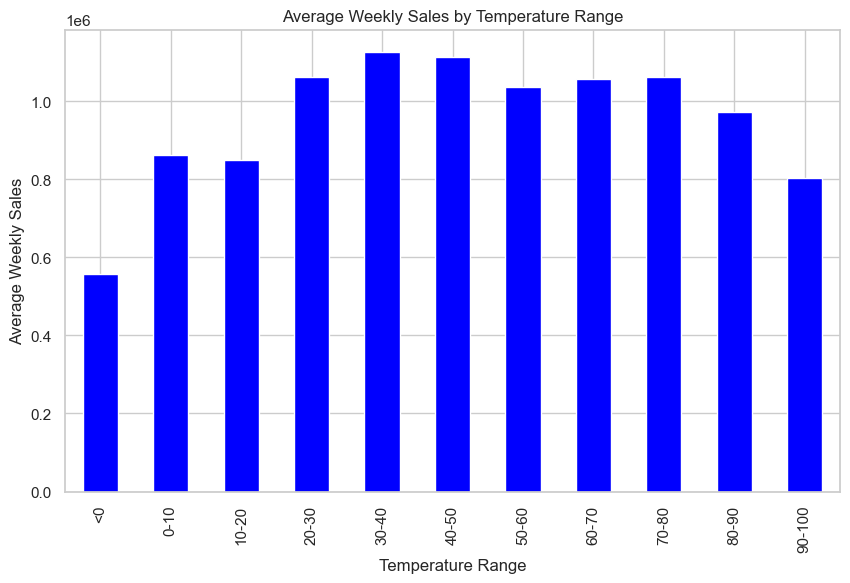

In [29]:
# Plot average sales by temperature range
plt.figure(figsize=(10, 6))
avg_sales_by_temperature.plot(kind='bar', color='blue')
plt.xlabel('Temperature Range')
plt.ylabel('Average Weekly Sales')
plt.title('Average Weekly Sales by Temperature Range')
plt.grid(True)
plt.show()

#### D. How is the Consumer Price index affecting the weekly sales of various stores?

In [30]:
# Calculate correlation between CPI and weekly sales
correlation_cpi_sales = df['CPI'].corr(df['Weekly_Sales'])

In [31]:
# Calculate average weekly sales for different CPI ranges
cpi_bins = [120, 140, 160, 180, 200, 220]
cpi_labels = ['120-140', '140-160', '160-180', '180-200', '200-220']
df['CPI Range'] = pd.cut(df['CPI'], bins=cpi_bins, labels=cpi_labels)
avg_sales_by_cpi = df.groupby('CPI Range')['Weekly_Sales'].mean()

In [32]:

# Print correlation and average sales by CPI range
print(f"Correlation between CPI and Weekly Sales: {correlation_cpi_sales:.2f}")
print("\nAverage Sales by CPI Range:")
print(avg_sales_by_cpi)

Correlation between CPI and Weekly Sales: -0.07

Average Sales by CPI Range:
CPI Range
120-140    1.075154e+06
140-160    1.202953e+06
160-180             NaN
180-200    1.055253e+06
200-220    1.006206e+06
Name: Weekly_Sales, dtype: float64


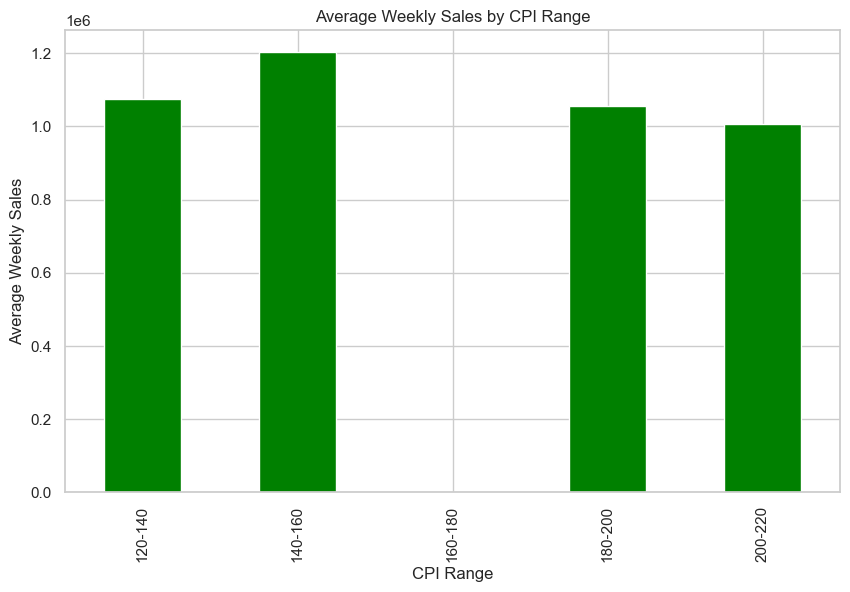

In [33]:
# Plot average sales by CPI range
plt.figure(figsize=(10, 6))
avg_sales_by_cpi.plot(kind='bar', color='green')
plt.xlabel('CPI Range')
plt.ylabel('Average Weekly Sales')
plt.title('Average Weekly Sales by CPI Range')
plt.grid(True)
plt.show()

#### E. Top performing stores according to the historical data.

In [34]:
#  calculates the total weekly sales for each store
total_sales_per_store = df.groupby('Store')['Weekly_Sales'].sum()

# Rank the stores based on total sales
top_performing_stores = total_sales_per_store.sort_values(ascending=False).head(10)

# Print the list of top-performing stores
print("Top Performing Stores:")
print(top_performing_stores)

Top Performing Stores:
Store
20    3.013978e+08
4     2.995440e+08
14    2.889999e+08
13    2.865177e+08
2     2.753824e+08
10    2.716177e+08
27    2.538559e+08
6     2.237561e+08
1     2.224028e+08
39    2.074455e+08
Name: Weekly_Sales, dtype: float64


#### F. The worst performing store, and how significant is the difference between the highest and lowest performing stores.

In [35]:
total_sales_per_store = df.groupby('Store')['Weekly_Sales'].sum()

# Identify the worst performing store
worst_performing_store = total_sales_per_store.idxmin()

In [36]:
# Calculate the difference between highest and lowest performing stores
highest_sales_store = total_sales_per_store.idxmax()
lowest_sales_store = worst_performing_store
sales_difference = total_sales_per_store[highest_sales_store] - total_sales_per_store[lowest_sales_store]

In [37]:
# Print the worst performing store and the sales difference
print(f"Worst Performing Store: Store {worst_performing_store}")
print(f"Difference between Highest and Lowest Performing Stores: {sales_difference:.2f}")

Worst Performing Store: Store 33
Difference between Highest and Lowest Performing Stores: 264237570.50


# Forecast model

In [38]:
# Assuming you have a 'Store' column in your dataset that identifies different stores
unique_stores = df['Store'].unique()

In [39]:
def tune_and_evaluate(model, param_grid, X_train, y_train, X_test, y_test):
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='r2')
    grid_search.fit(X_train, y_train)
    best_params = grid_search.best_params_
    best_estimator = grid_search.best_estimator_
    best_score = grid_search.best_score_
    print("Best parameters are: ", best_params)
    print('Mean cross-validated score of the best_estimator is: ', best_score)
    print("Training set R-squared:", round(best_estimator.score(X_train, y_train), 2))
    print("Test set R-squared:", round(best_estimator.score(X_test, y_test), 2))

    return best_estimator

In [40]:
unique_stores

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45], dtype=int64)

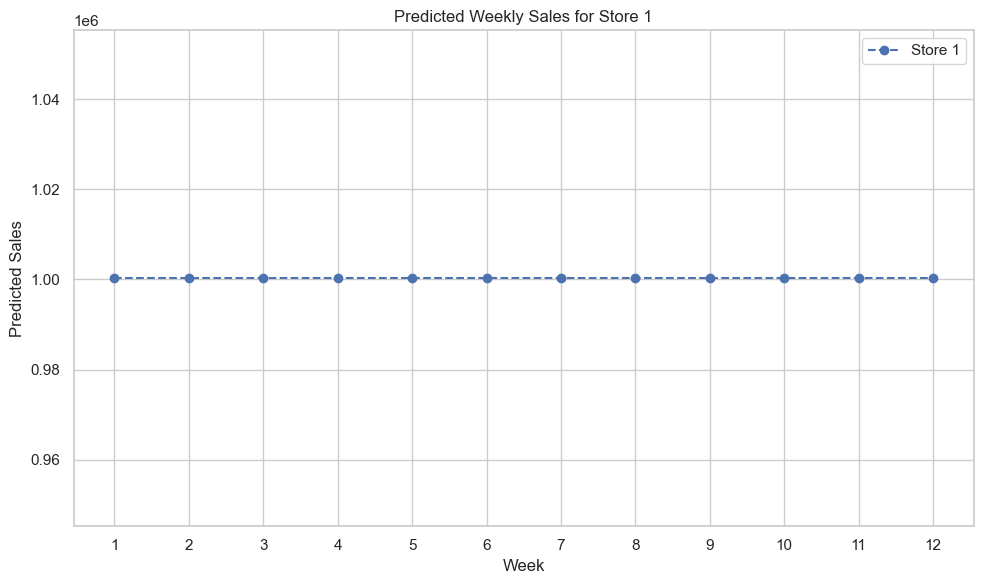

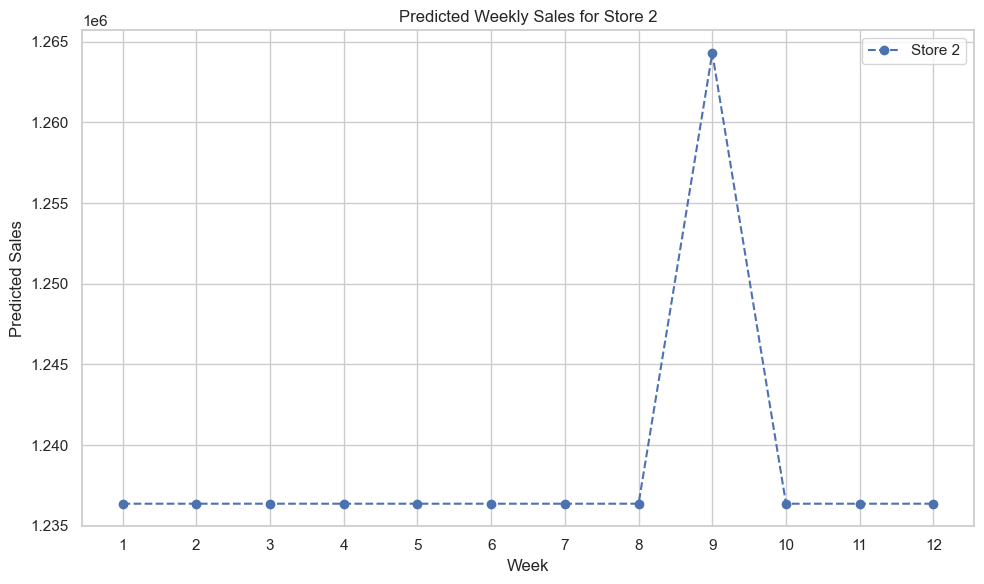

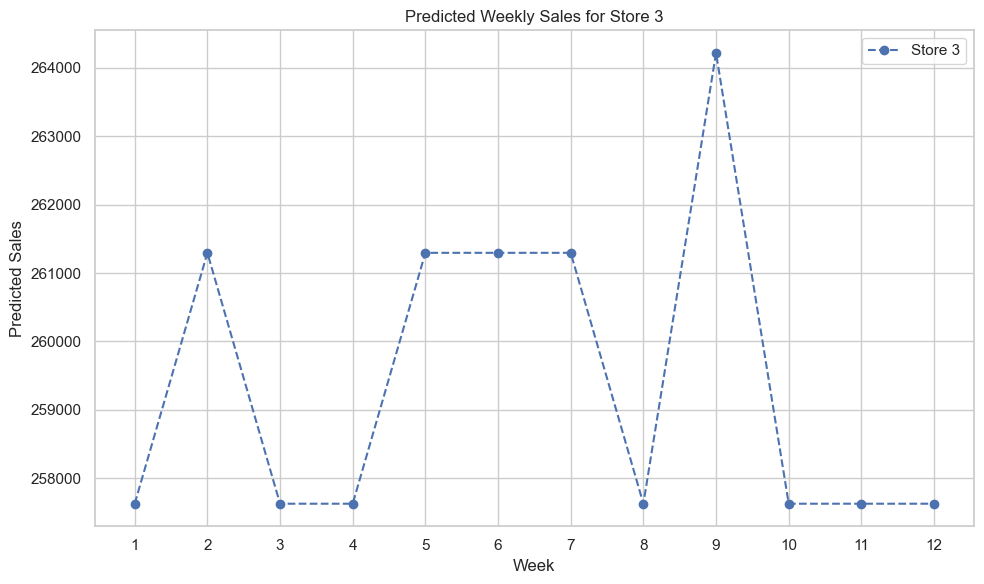

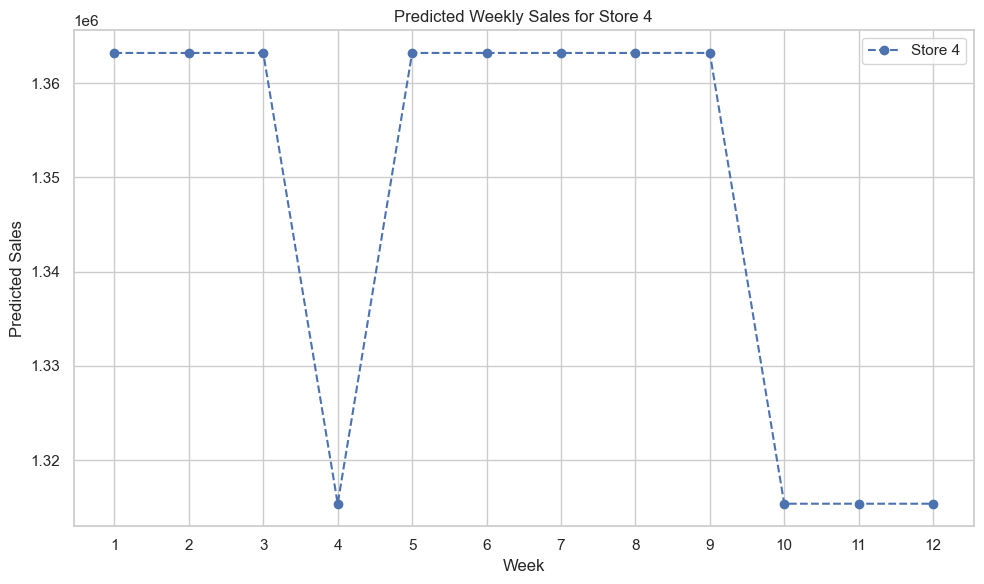

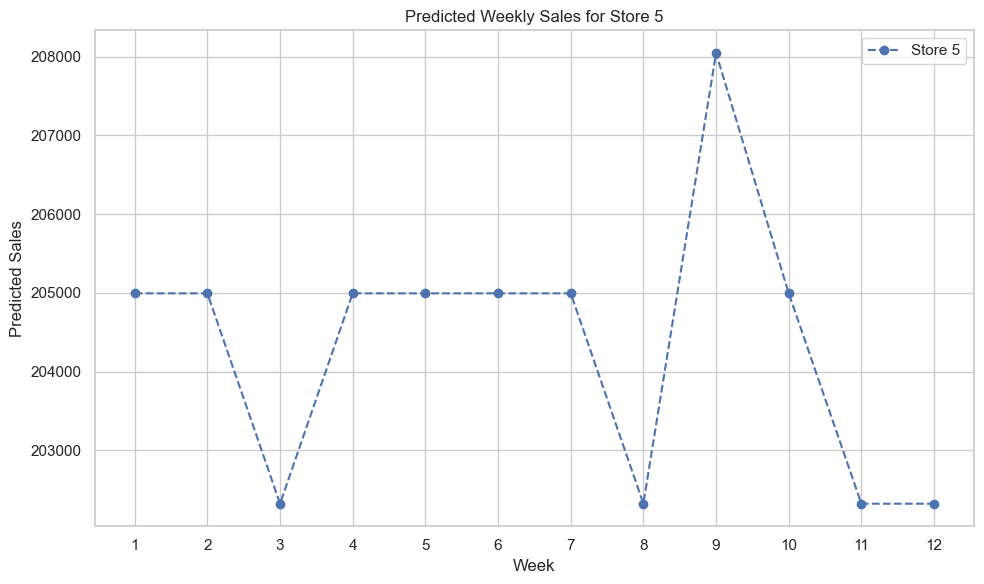

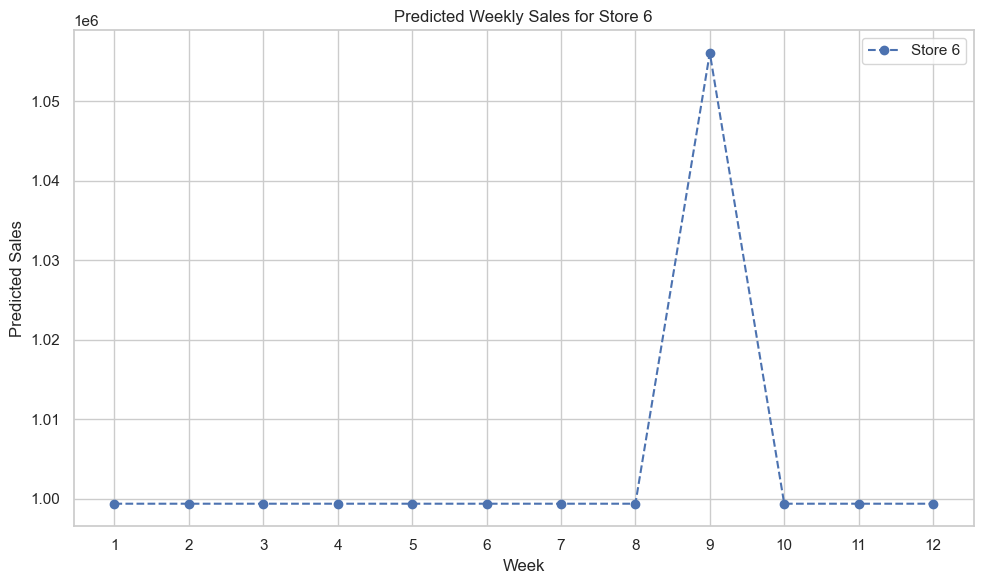

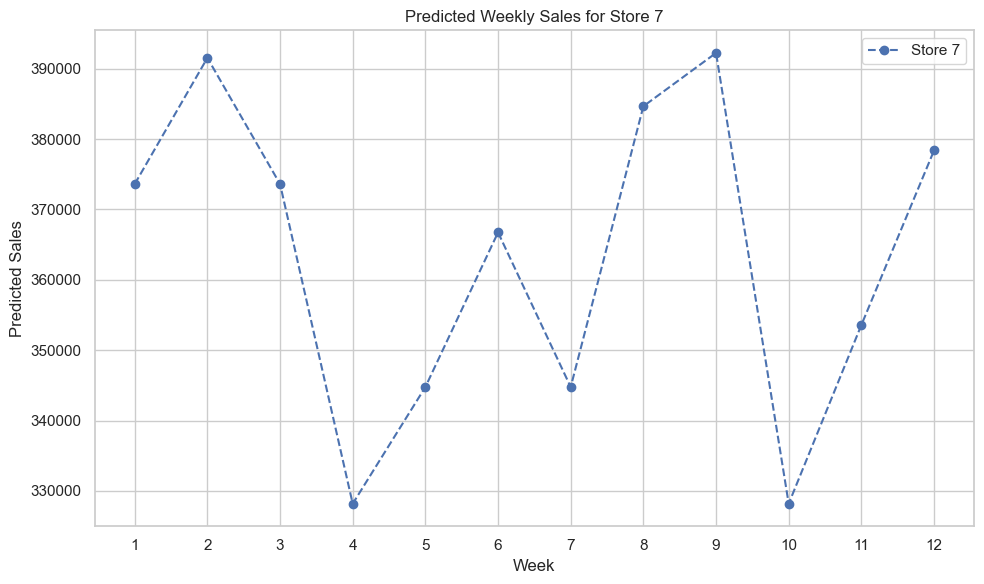

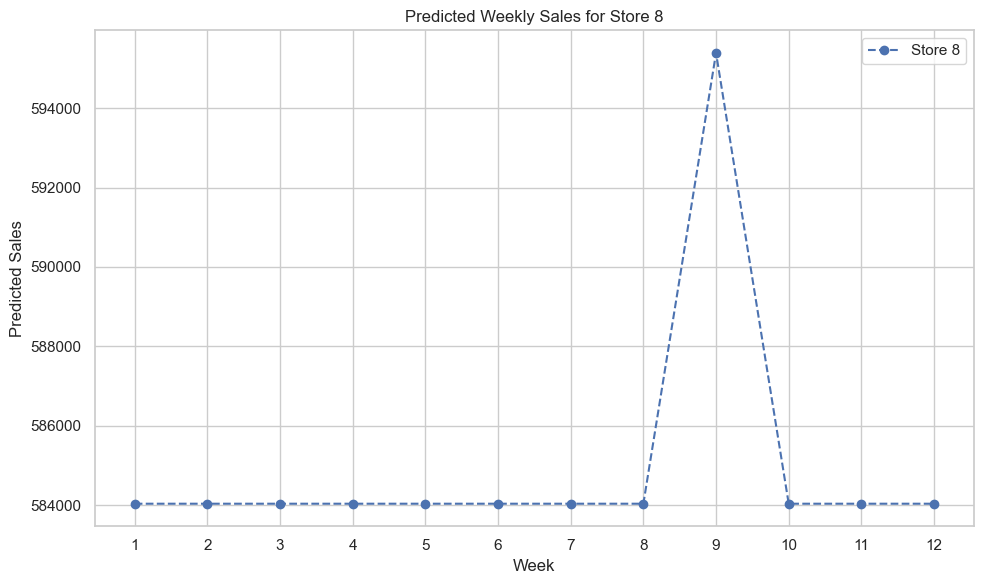

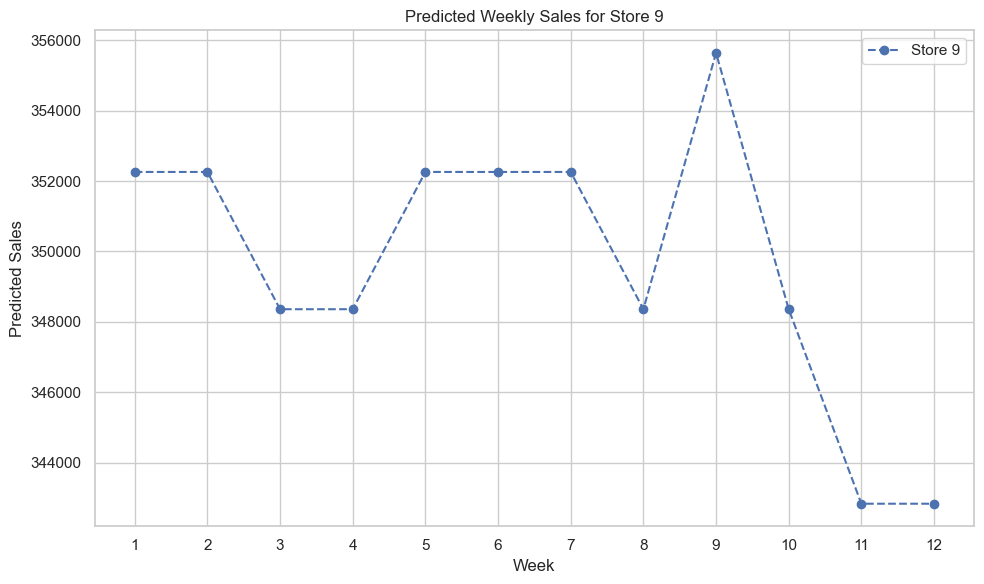

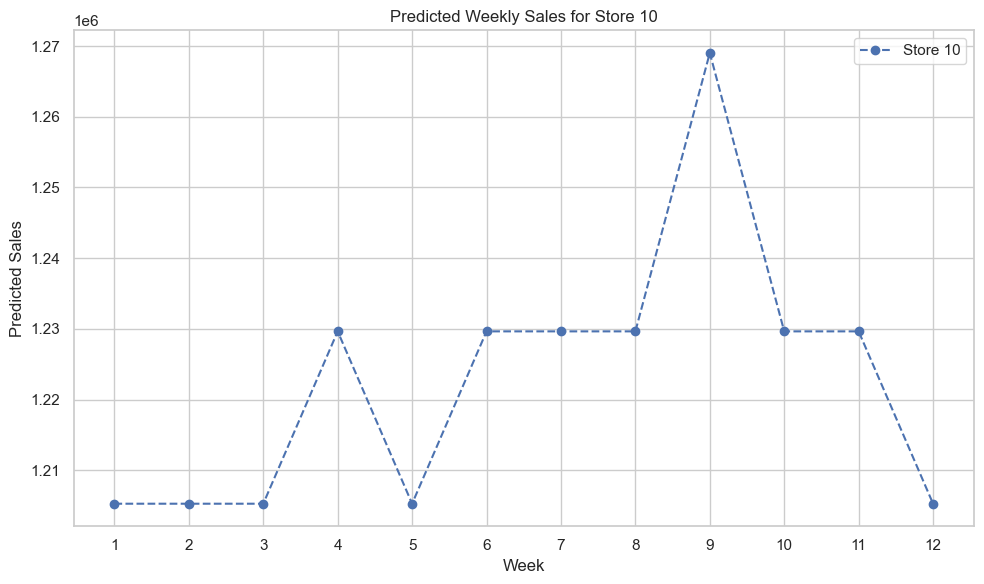

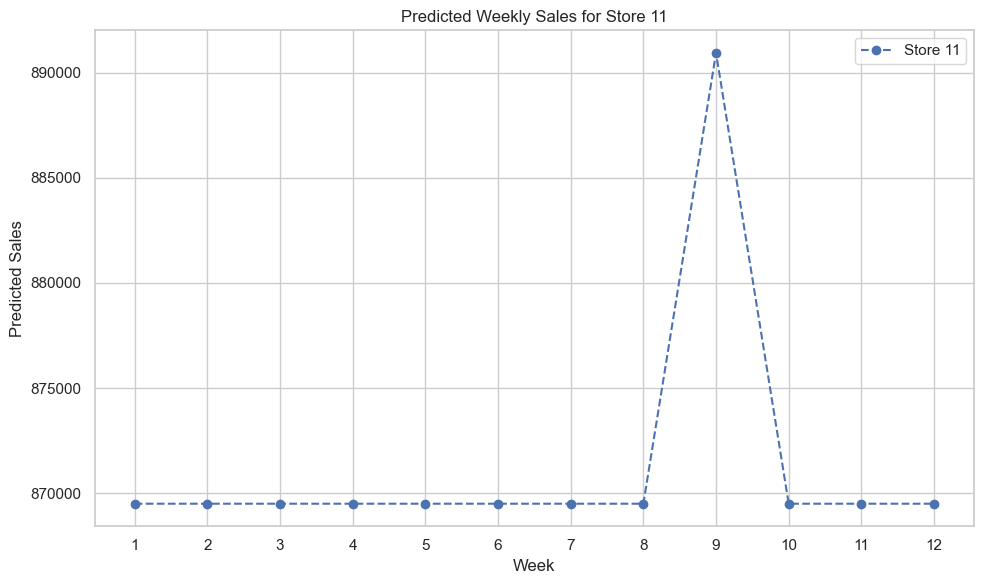

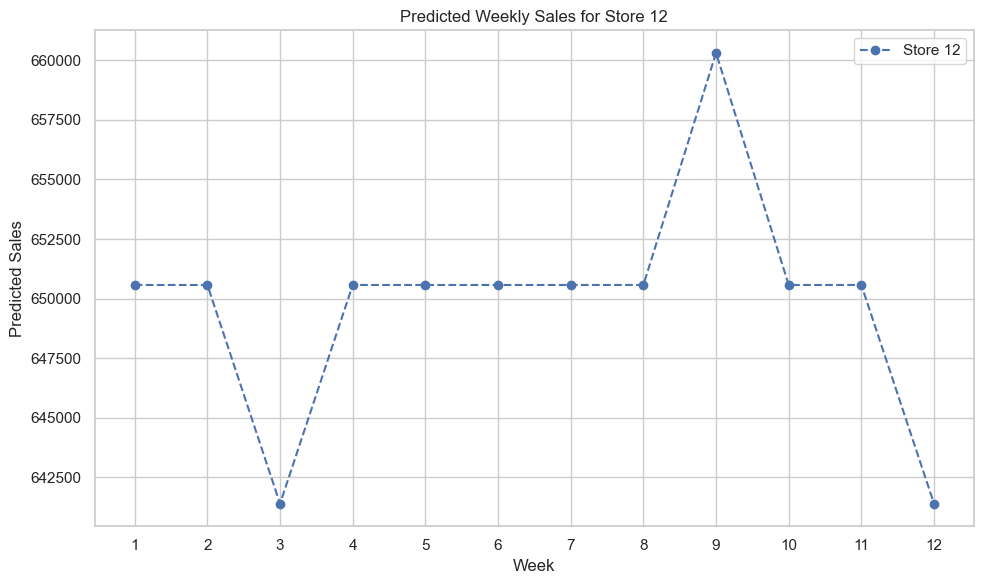

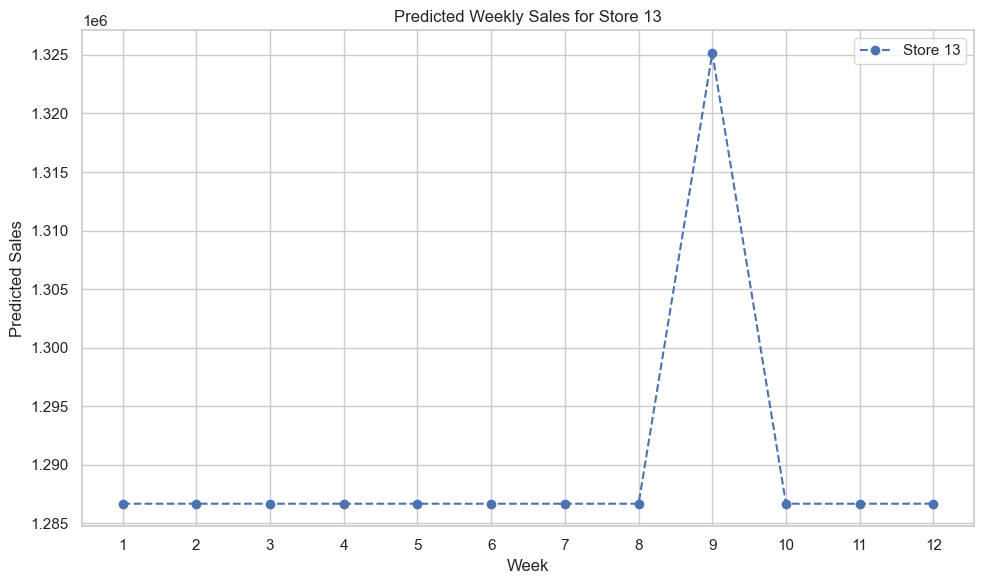

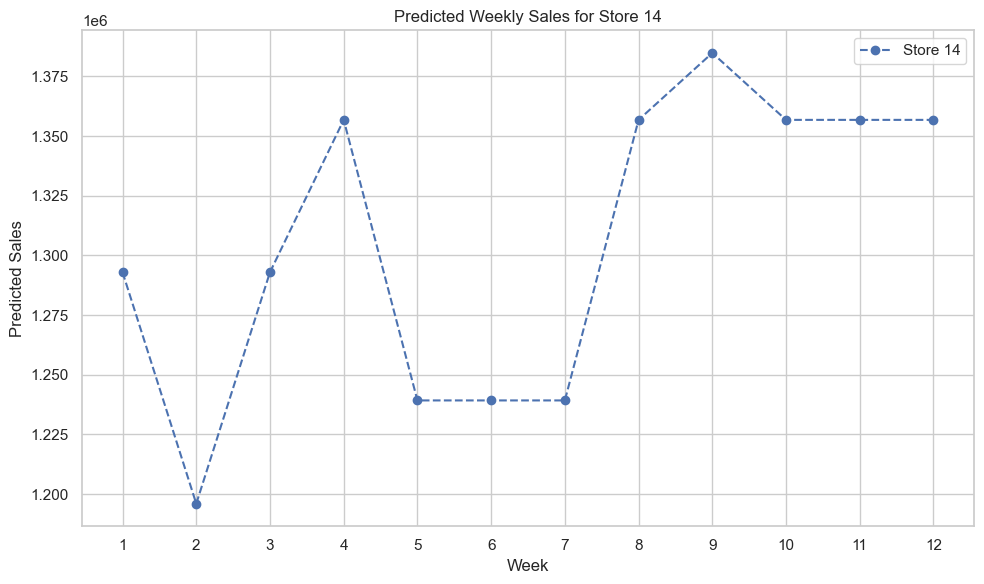

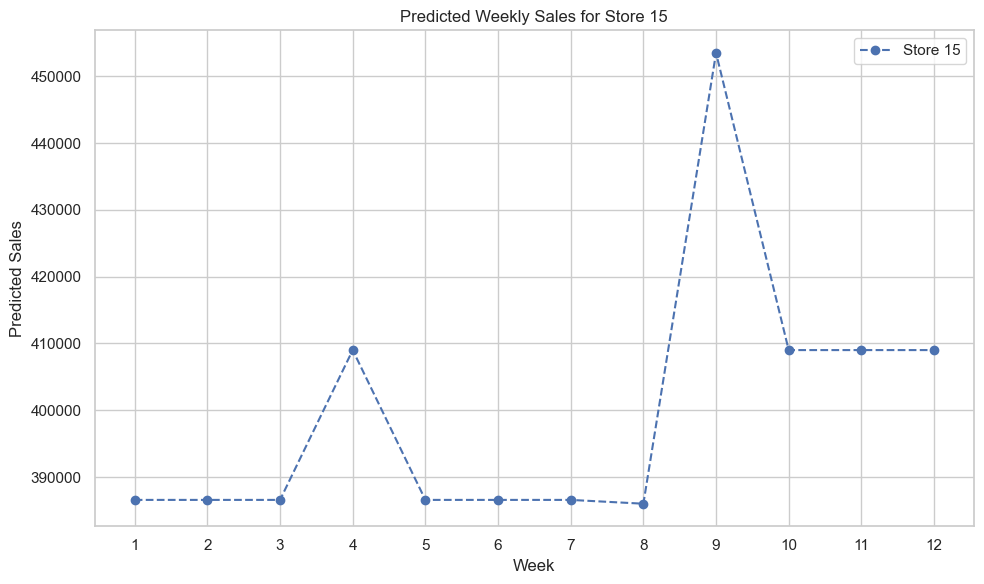

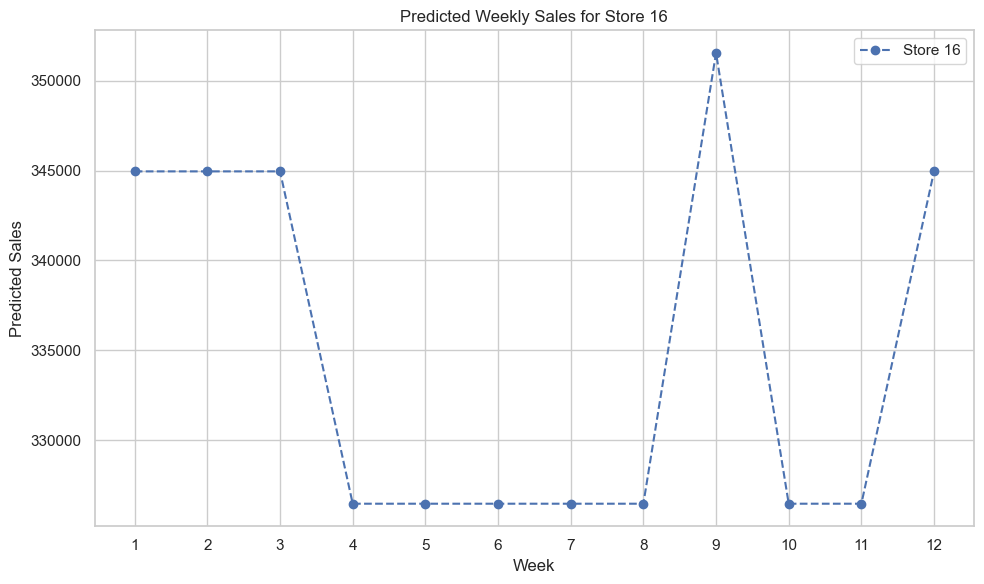

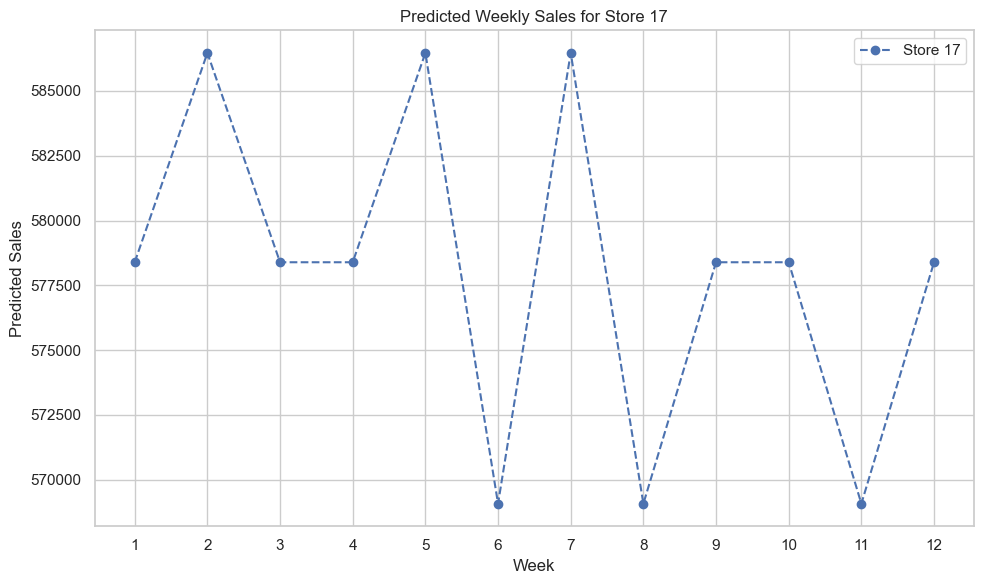

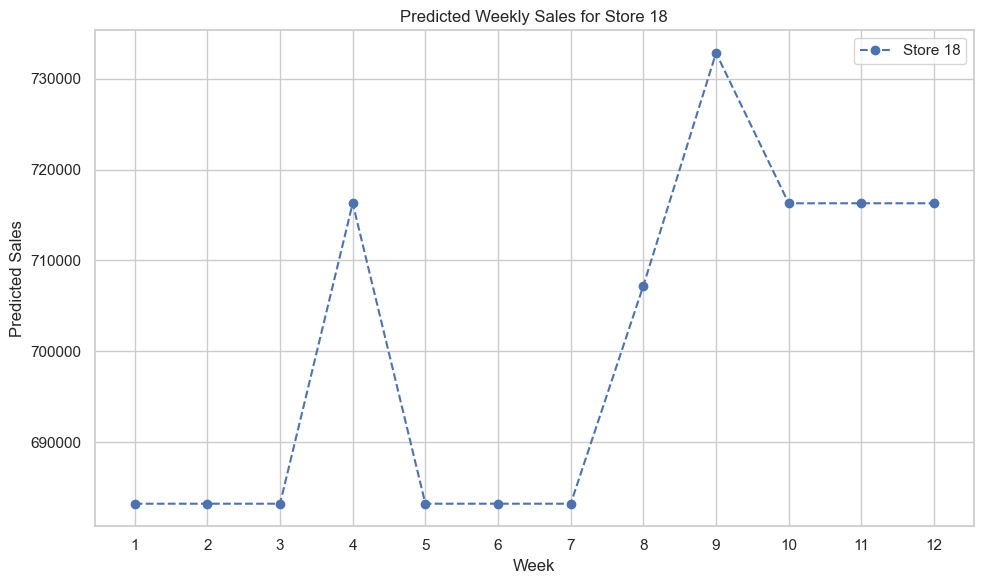

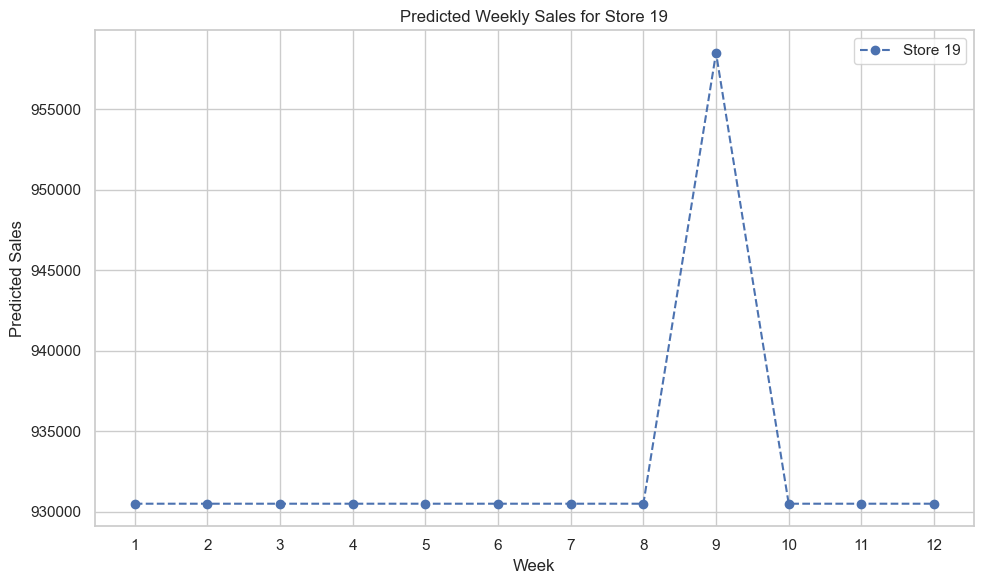

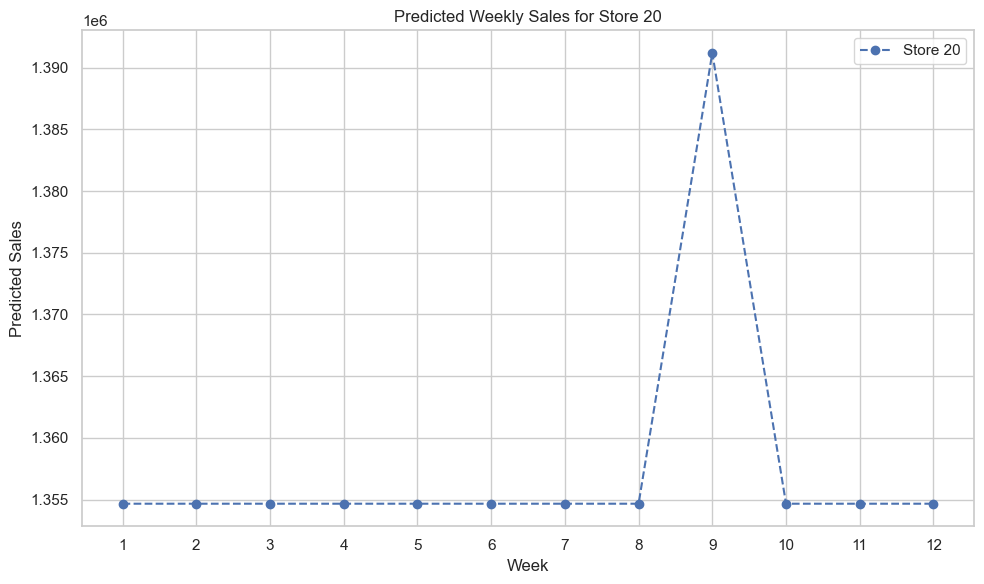

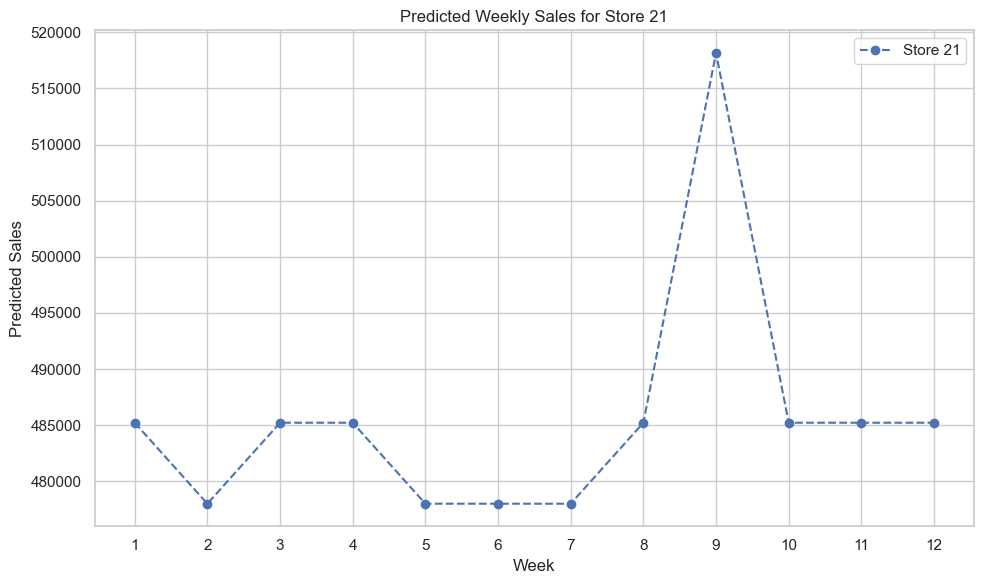

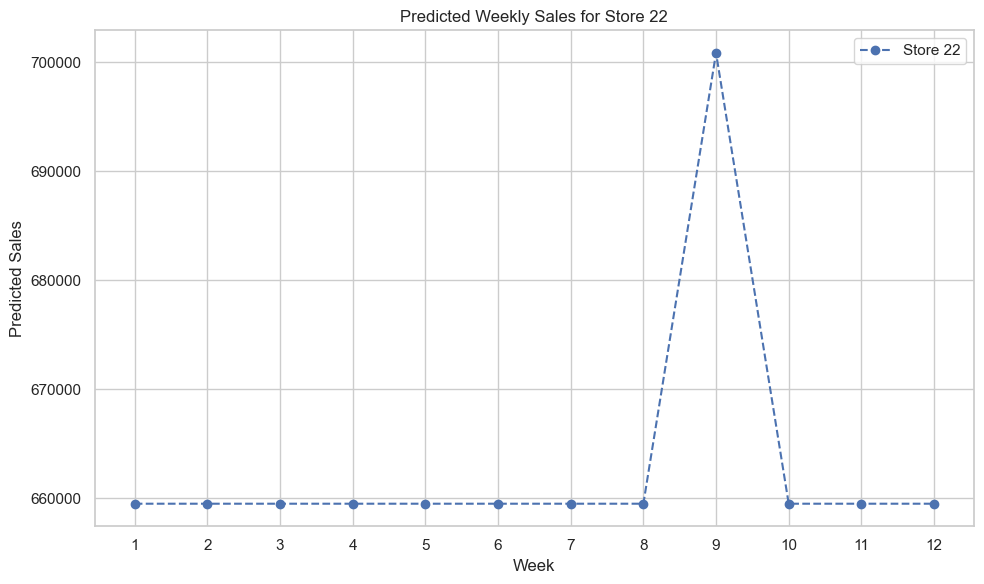

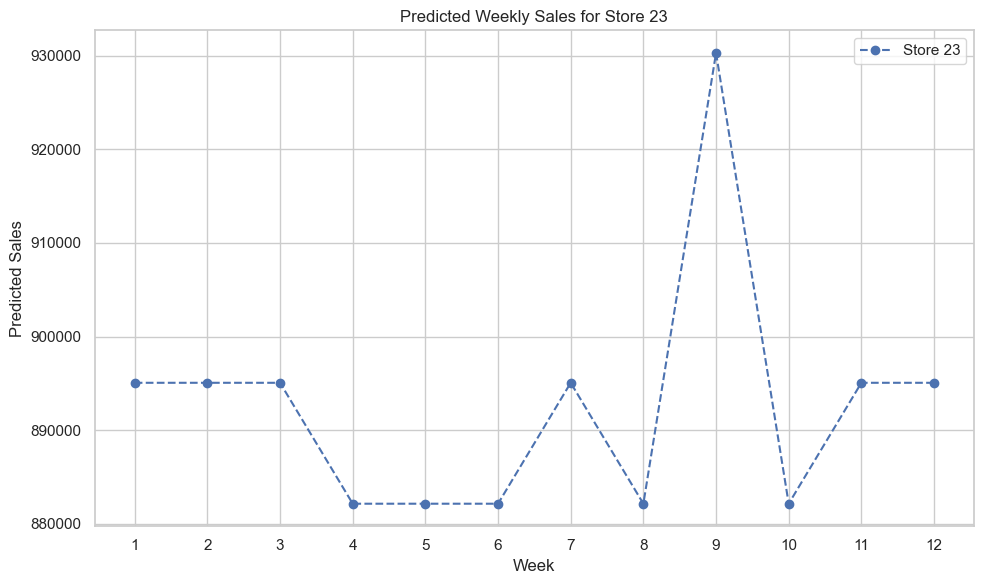

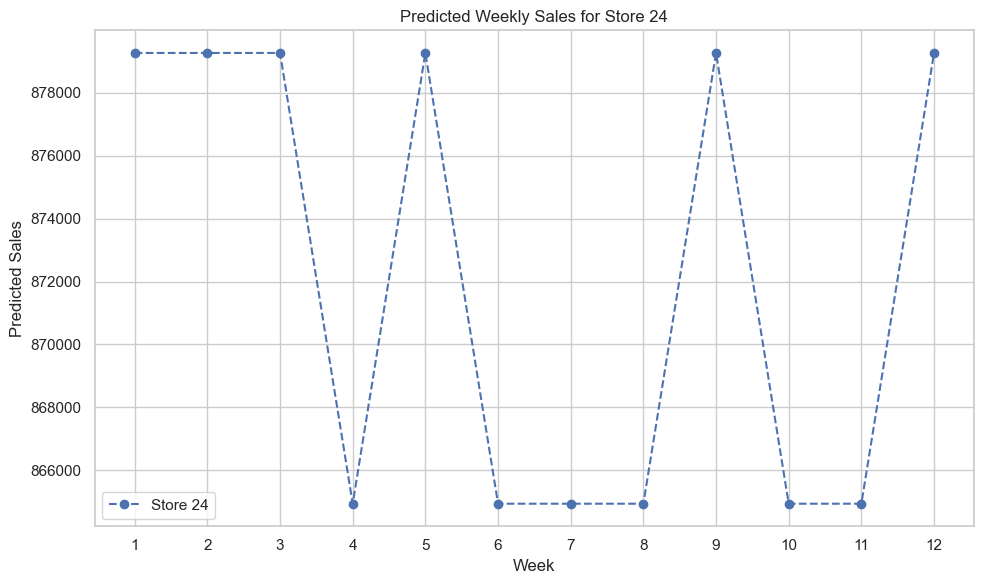

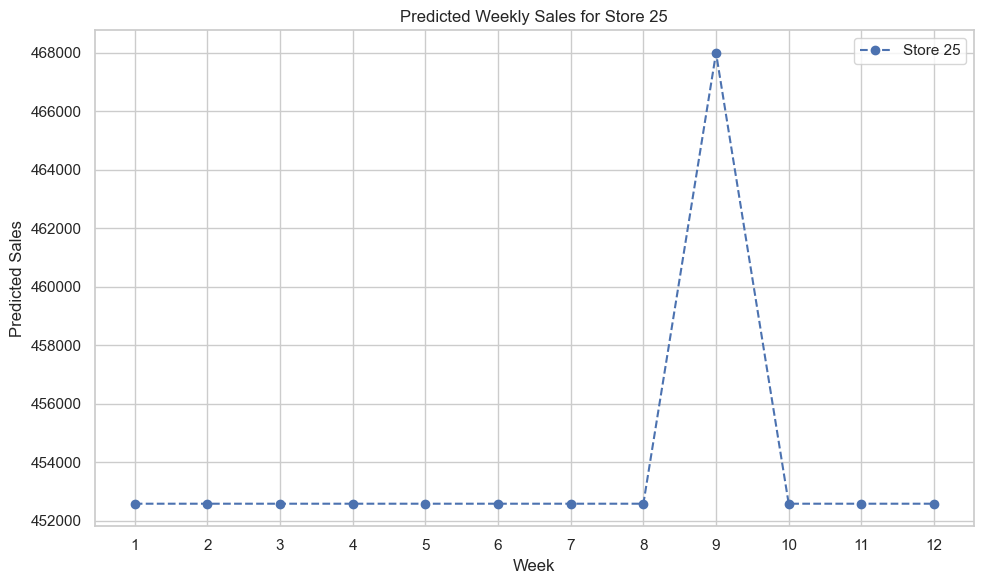

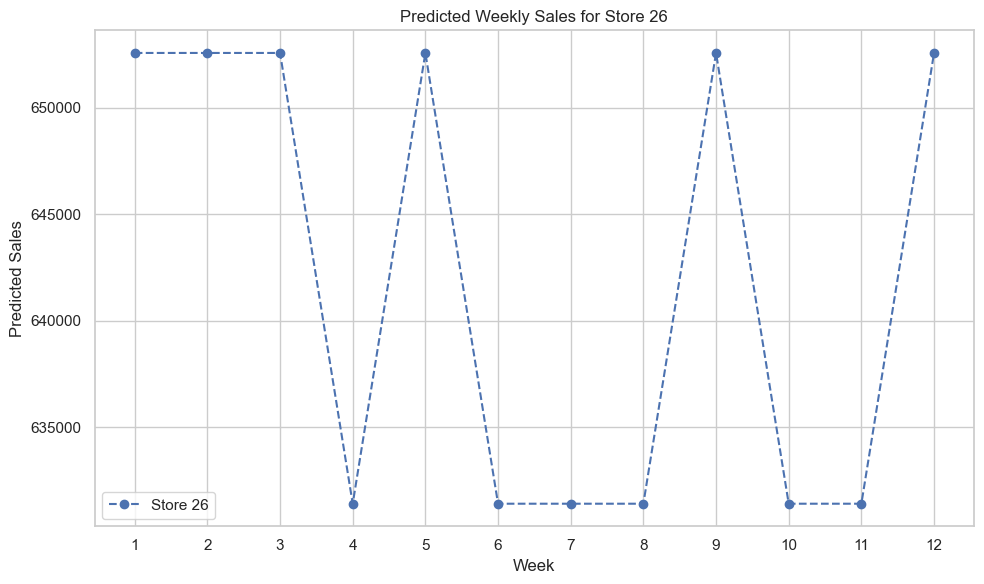

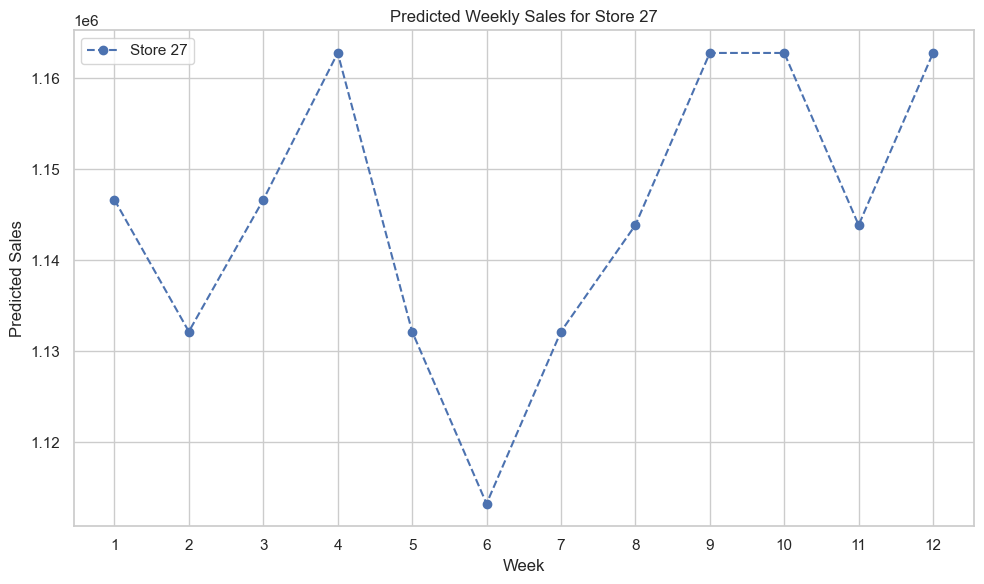

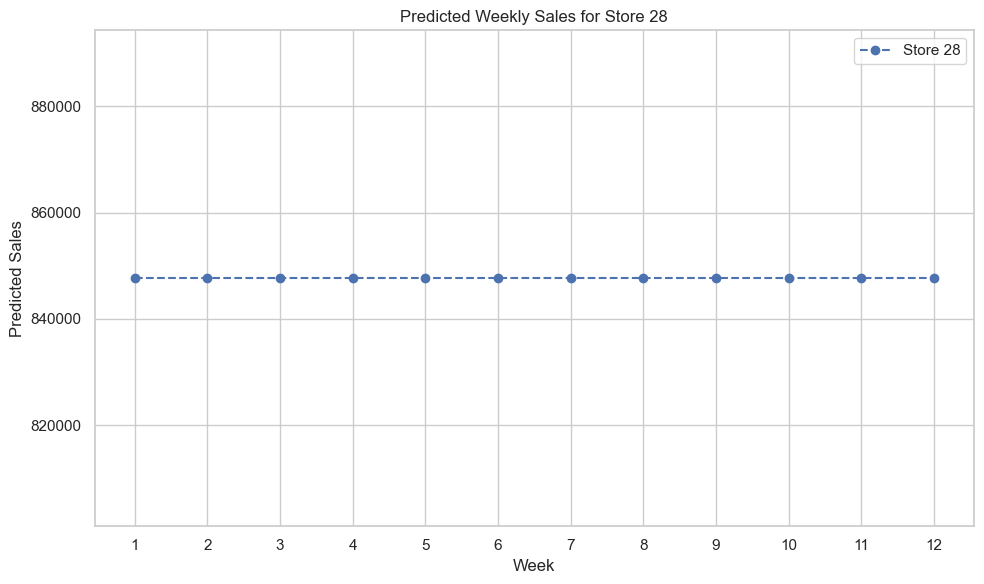

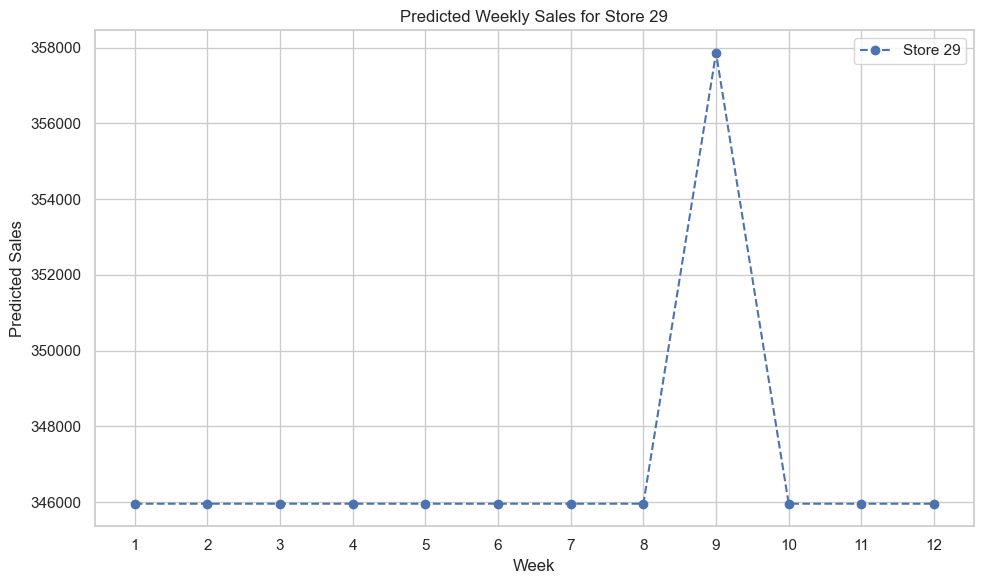

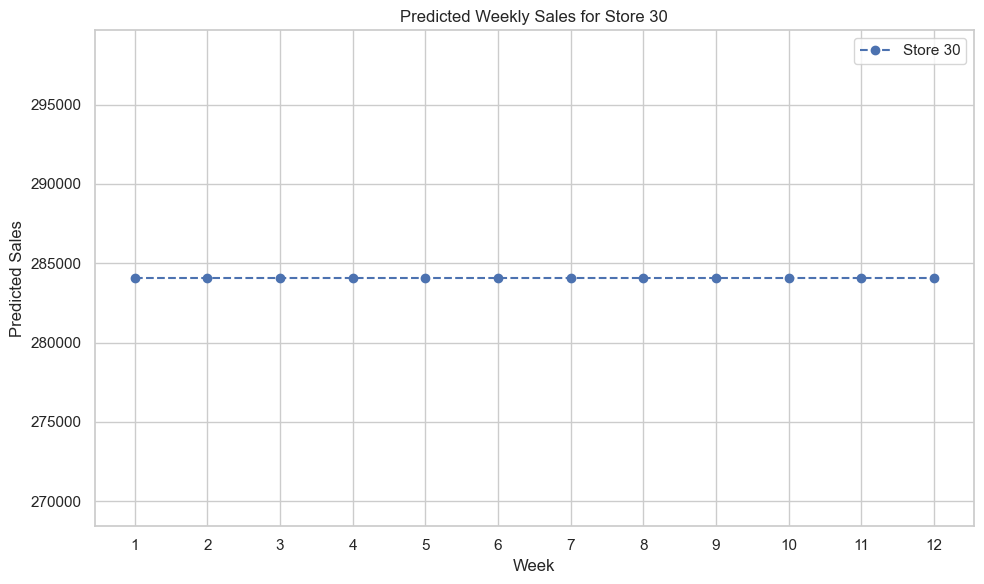

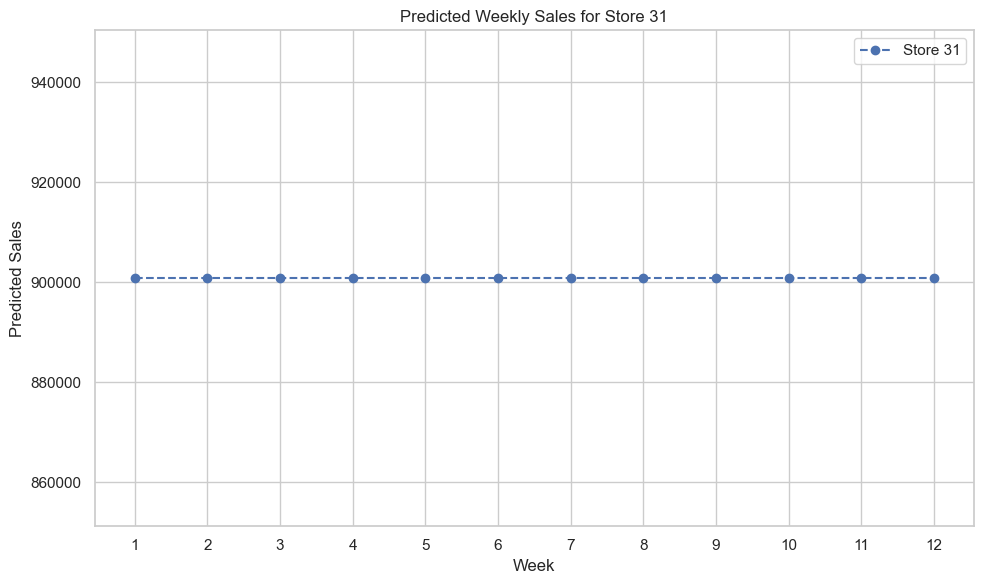

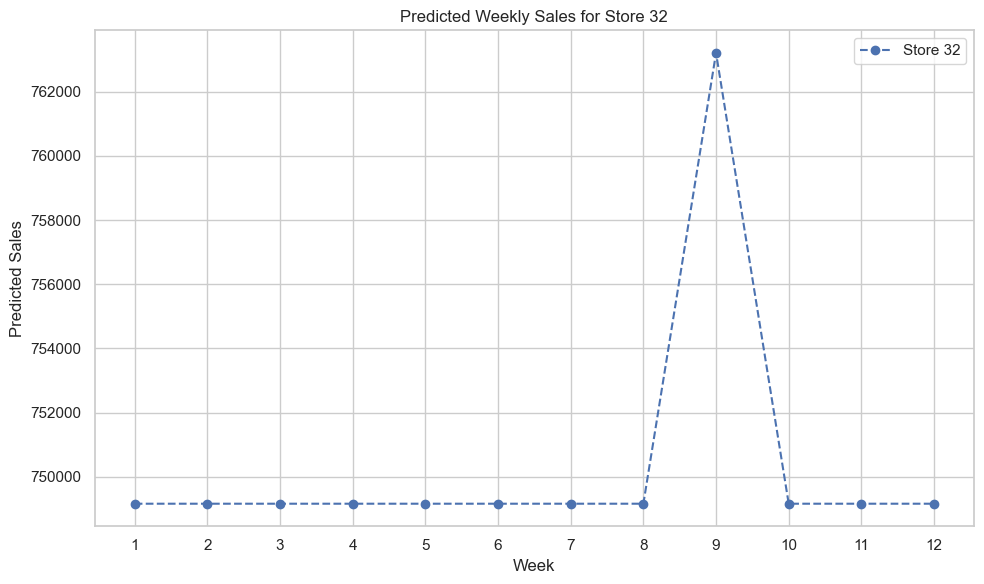

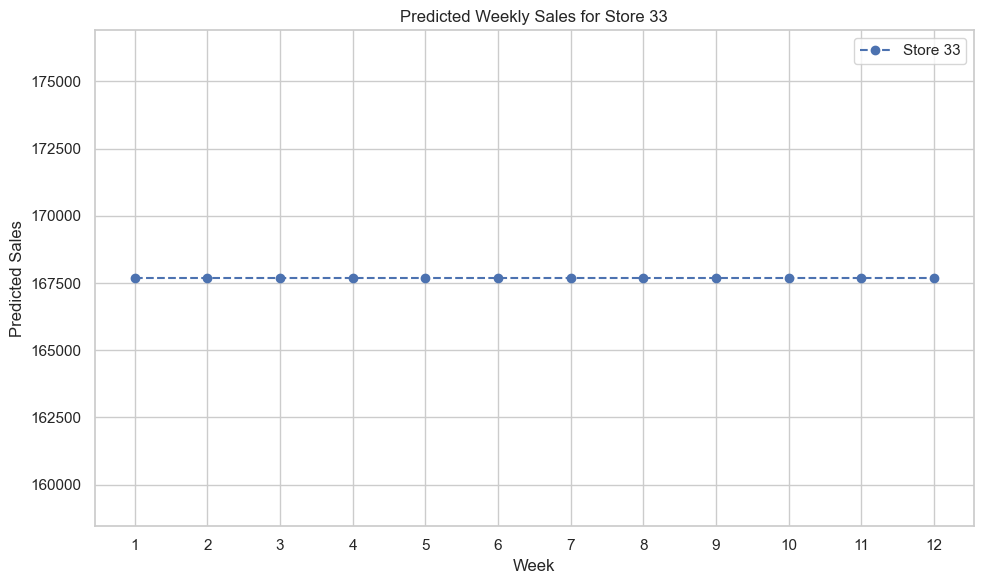

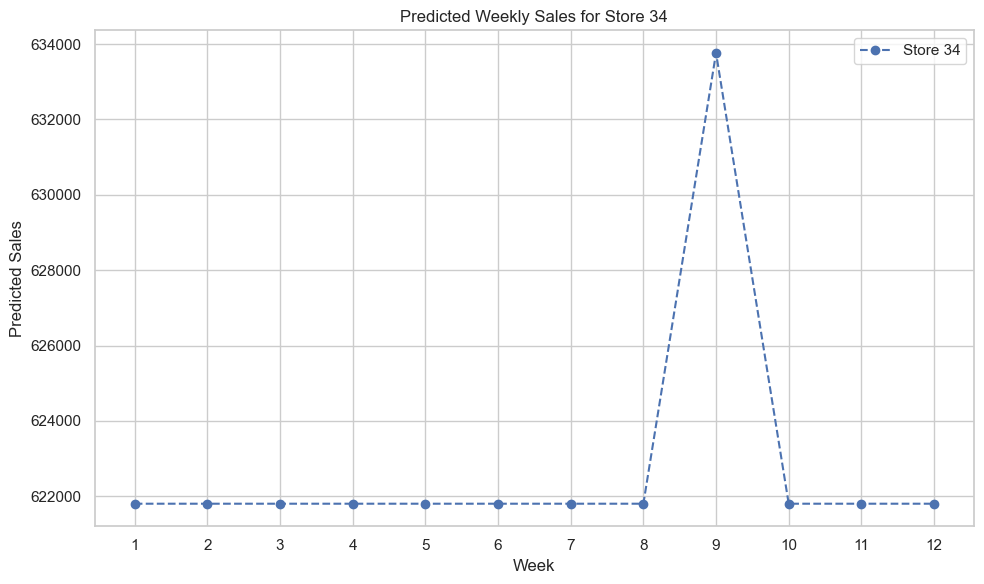

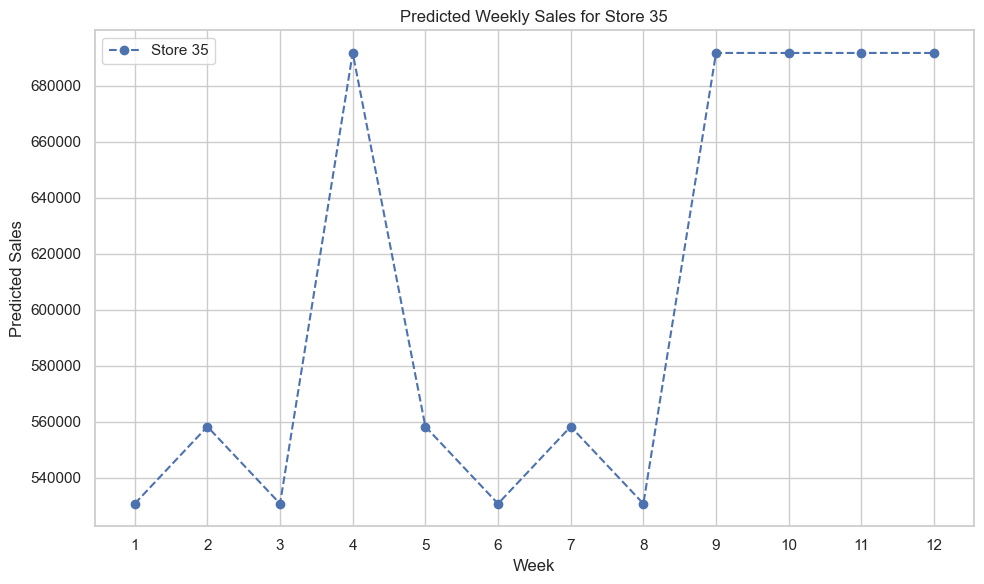

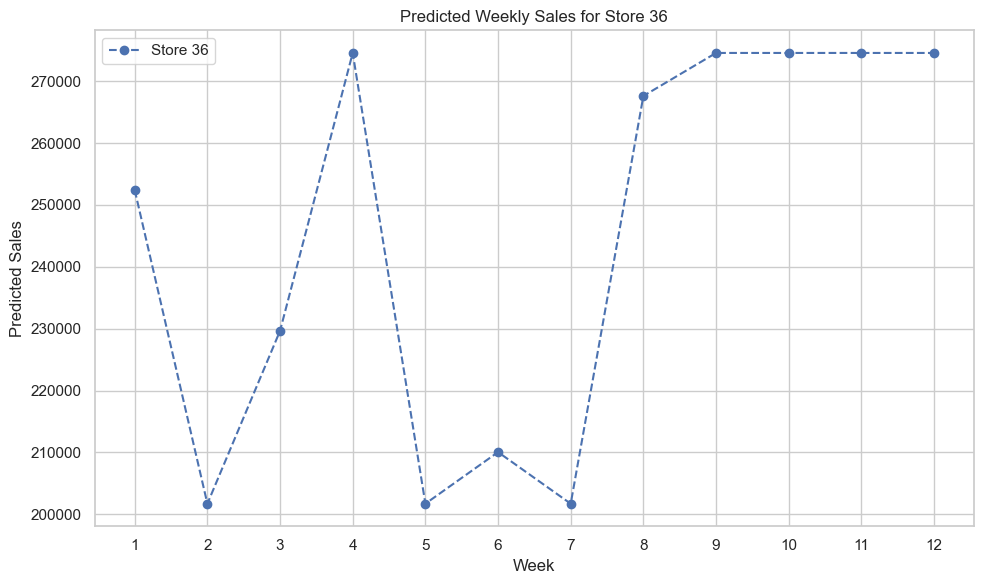

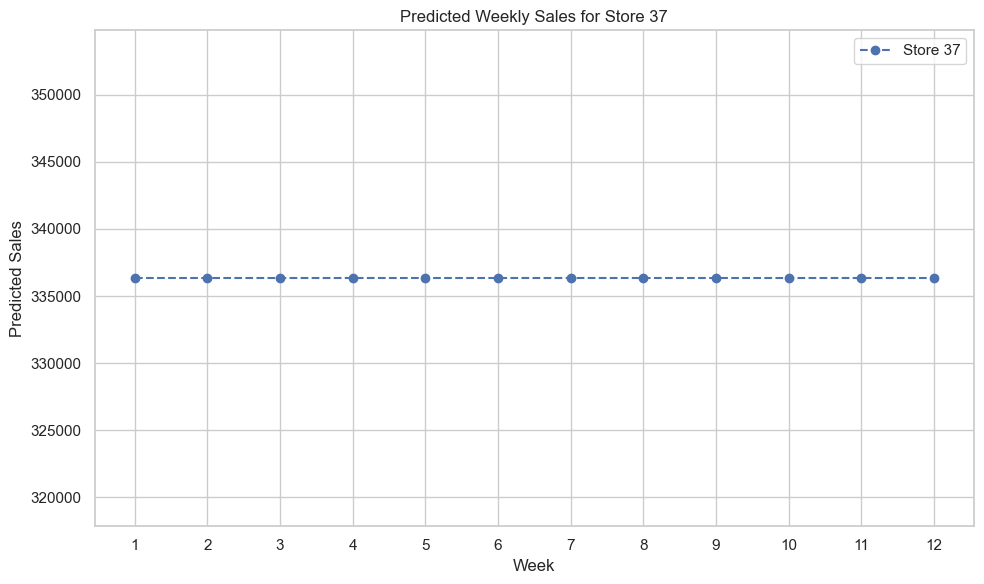

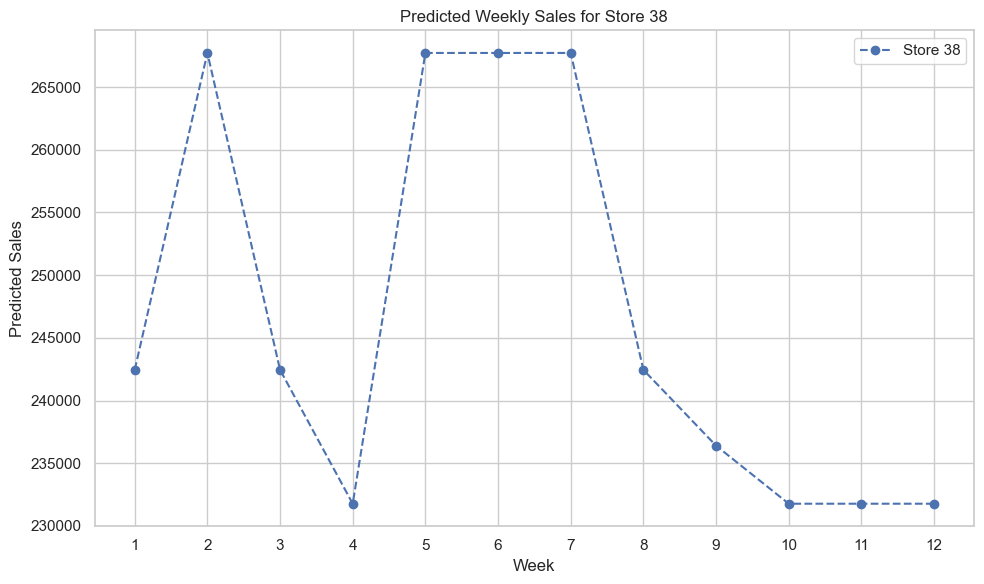

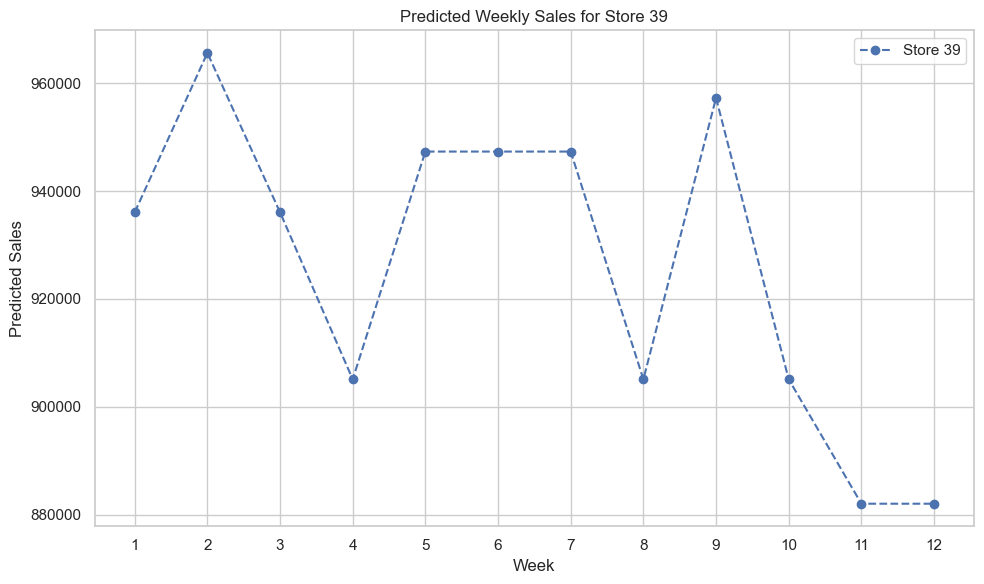

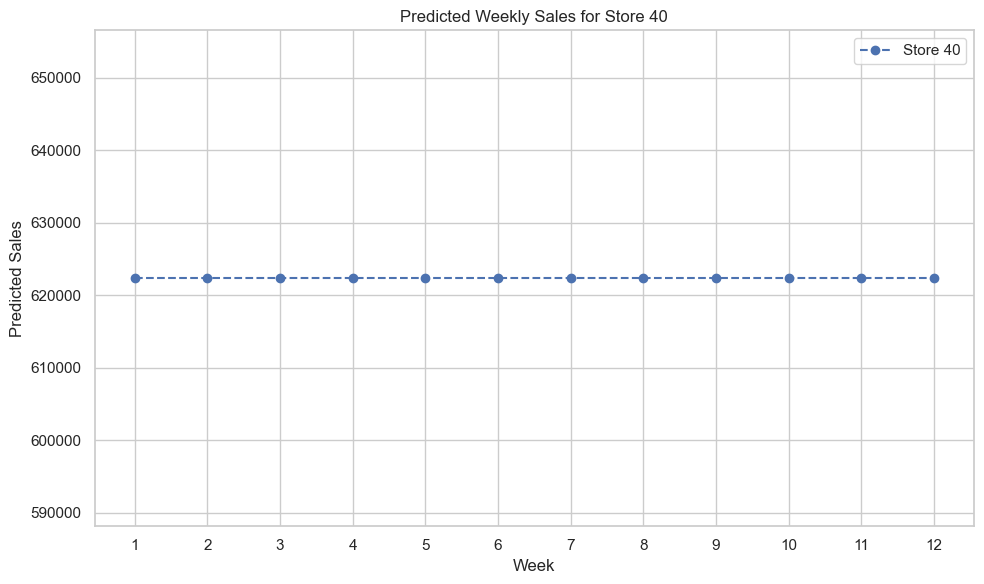

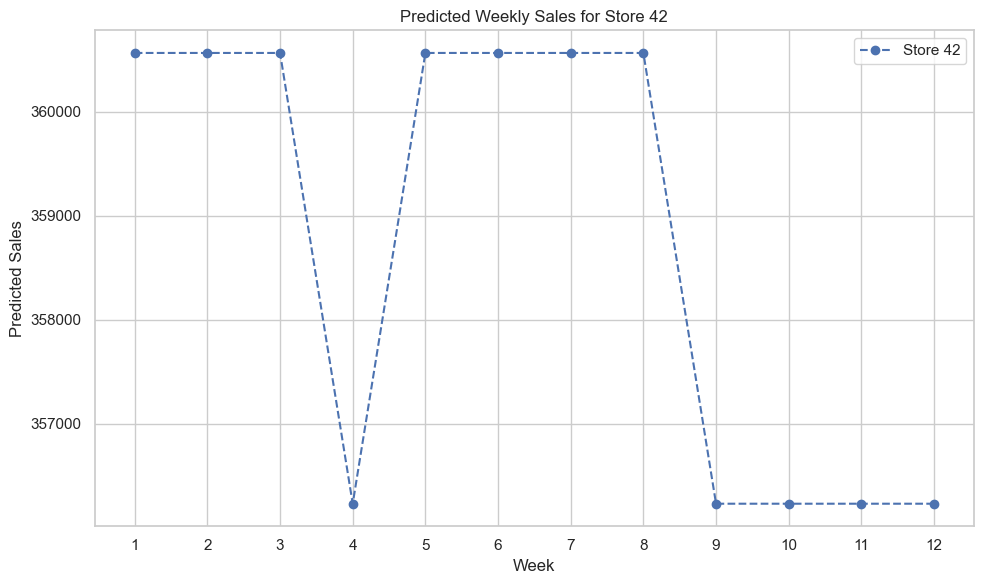

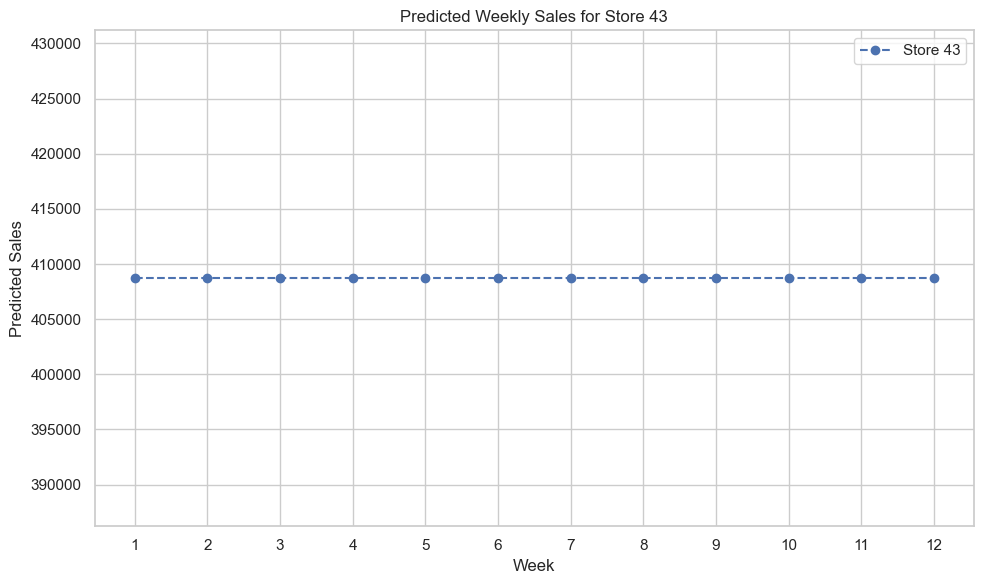

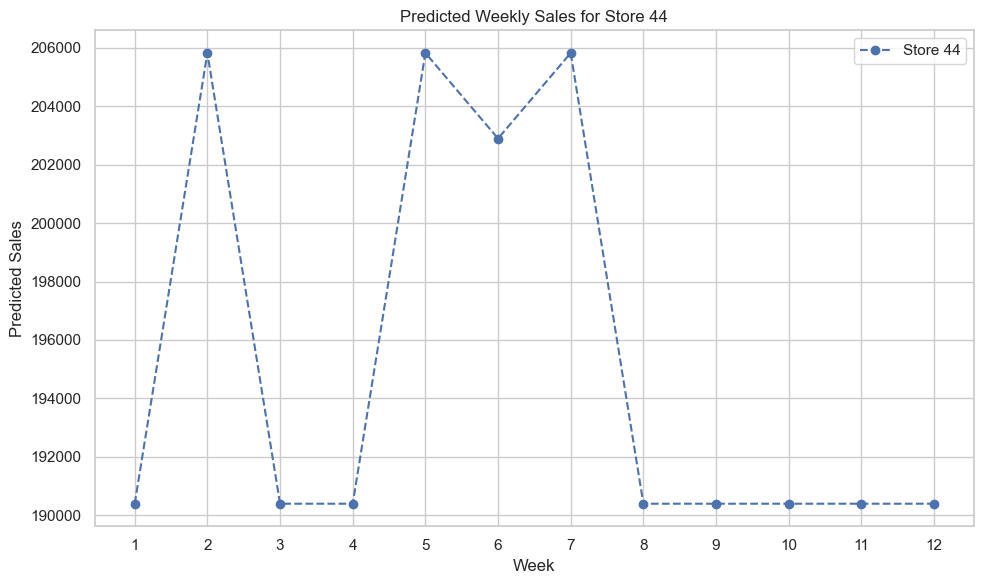

In [41]:

# Loop through unique store IDs
for store_id in unique_stores:
    store_data = df[df['Store'] == store_id]
    
    # Select features and target
    features = store_data.columns.drop(['Weekly_Sales', 'Date'])
    target = 'Weekly_Sales'

    X_store = store_data[features]
    y_store = store_data[target]

    # Split the data into training and testing sets
    X_train_store, X_test_store, y_train_store, y_test_store = train_test_split(
        X_store, y_store, random_state=42, test_size=0.2)

    # Encoding categorical features
    encoder = BinaryEncoder(cols=['Temperature Range', 'CPI Range'])
    X_train_store_encoded = encoder.fit_transform(X_train_store)
    X_test_store_encoded = encoder.transform(X_test_store)

    # Initialize the XGBoost regressor
    xgb_store = xgb.XGBRegressor(
        objective='reg:squarederror',
        n_jobs=-1,
        colsample_bytree=0.3,
        learning_rate=0.1,
        max_depth=5,
        alpha=10,
        n_estimators=10
    )

    # Fit the model
    xgb_store.fit(X_train_store_encoded, y_train_store)

    # Generate predictions for the next 12 weeks
    next_12_weeks_predictions_store = xgb_store.predict(X_test_store_encoded[-12:]).tolist()

    # Plot the predicted sales
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, 13), next_12_weeks_predictions_store, marker='o', label=f'Store {store_id}', linestyle='dashed')
    plt.title(f"Predicted Weekly Sales for Store {store_id}")
    plt.xlabel("Week")
    plt.ylabel("Predicted Sales")
    plt.legend()
    plt.xticks(range(1, 13))
    plt.tight_layout()
    plt.show()
